
<h1 style ='text-align:center;'>
 <b>STAT40800 Data Programming with Python (online)<br><br>FINAL PROJECT</b>
</h1>

<h3 style='text-align:center'>
<b>Author:</b> Sudhanshu Naresh Nerkar<br>  
<b>ID:</b> 24226989  
</h3>

---

## **Table of Contents**
* **Question 1:** Red Wine Dataset Analysis  
    
* **Question 2:** White Wine Dataset and Comparison
   
* **Question 3:** Combining Datasets and Correlation Analysis
   
* **Question 4:** Linear Regression to Predict Wine Quality
   
* **Question 5:** Random Forest Regression

* **Question 6:** Clustering Algorithms

* **Honour Code Statement**


# **Question 1: Red Wine Dataset Analysis**


### (a) Load the winequality-red.csv dataset into Python as a pandas DataFrame.

In [170]:
# Import necessary libraries
import pandas as pd

#loading the red wine dataset 
red_wine_df = pd.read_csv('winequality-red.csv',delimiter=';')

# Display the first few rows
red_wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### Why delimiter=';' is Used?
The delimiter parameter in the pd.read_csv() function specifies the character that separates values in the file.
In this case, the dataset file winequality-red.csv uses a semicolon (;) as the separator between columns instead of the more common comma (,).

###  (b) Inspect the data. How many wines are included in this dataset? How many different indicators  are included? Does this dataset contain any missing values?

In [171]:
# Check the number of wines and indicators
num_wines = red_wine_df.shape[0]  # Number of rows
num_indicators = red_wine_df.shape[1]  # Number of columns

# Check for missing values
missing_values = red_wine_df.isnull().sum().sum()

# Print the results
print(f"Number of wines: {num_wines}")
print(f"Number of different indicators: {num_indicators}")
print(f"Missing values: {missing_values}")


Number of wines: 1599
Number of different indicators: 12
Missing values: 0


### (c) Perform an exploratory data analysis, creating both numerical and graphical summaries of the data. Discuss and interpret your results

#### 1. Numerical Summaries

In [172]:
# Summary statistics for all indicators
red_wine_df.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#### 2. Graphical Summaries


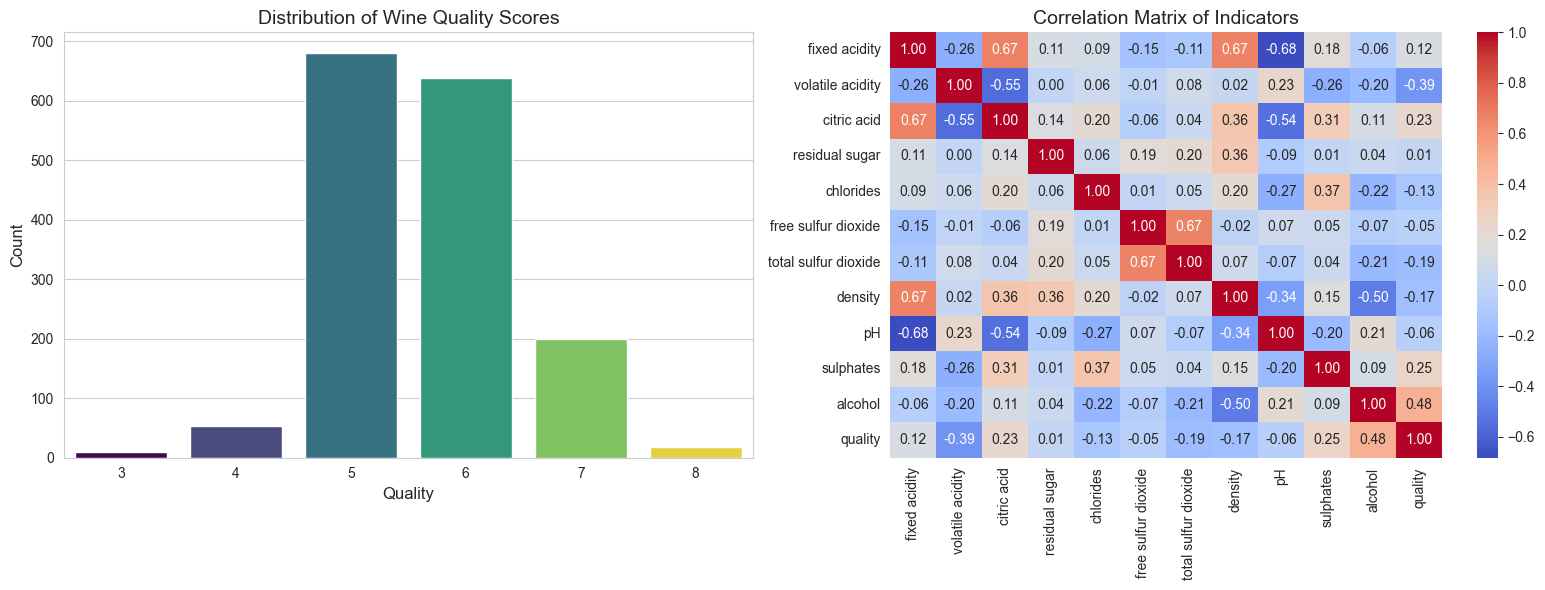

In [173]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns layout

# Subplot 1: Distribution of Wine Quality Scores
sns.countplot(
    x='quality', 
    data=red_wine_df, 
    hue='quality', 
    palette='viridis', 
    legend=False, 
    ax=axes[0]  # Specify the first subplot
)
axes[0].set_title('Distribution of Wine Quality Scores', fontsize=14)
axes[0].set_xlabel('Quality', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)

# Subplot 2: Correlation Heatmap
sns.heatmap(
    red_wine_df.corr(), 
    annot=True, 
    cmap='coolwarm', 
    fmt='.2f', 
    ax=axes[1]  # Specify the second subplot
)
axes[1].set_title('Correlation Matrix of Indicators', fontsize=14)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


## **Discussions and Interpretation**

### 1. Distribution of Wine Quality Scores (Left Plot)

#### Observations:
- **Most Common Quality Scores**: The majority of the red wine samples have a quality score of **5** or **6**, with **5** being the most frequent.
- **Lower Scores**: A small proportion of wines are rated as **3** or **4**, indicating poorer quality wines are less frequent in the dataset.
- **Higher Scores**: Similarly, very few wines are rated **7** or **8**, suggesting that high-quality wines are rare.

#### Interpretation:
- The data distribution is slightly skewed toward medium-quality wines. This could reflect the dataset's sampling or that most wines in this collection are average in quality.
- The distribution also indicates that this dataset might not be ideal for studying extremely high- or low-quality wines due to their low representation. 

#### Actionable Insights:
- When applying predictive models to this dataset, the skewed distribution could bias the model toward predicting the majority classes (scores 5 and 6). Techniques like **class weighting** or **oversampling minority classes** might help.

---

### 2. Correlation Matrix of Indicators (Right Plot)

#### Observations:
- **Strong Positive Correlations**:
  - **`density` and `fixed acidity` (0.67)**: Denser wines tend to have higher acidity levels.
  - **`alcohol` and `quality` (0.48)**: Higher alcohol content appears to be associated with higher-quality wines.
  - **`citric acid` and `fixed acidity` (0.67)**: These two features are closely related chemically.

- **Strong Negative Correlations**:
  - **`pH` and `fixed acidity` (-0.68)**: This aligns with the chemical property that acidity lowers pH levels.
  - **`volatile acidity` and `quality` (-0.39)**: Higher volatile acidity (indicating spoilage or sharp flavors) is associated with lower wine quality.

- **Weak Correlations with `quality`**:
  - Most features like `residual sugar`, `chlorides`, and `density` show weak or negligible correlations with the target variable (`quality`).

#### Interpretation:
- **Key Predictors for Quality**:
  - Features like `alcohol`, `volatile acidity`, and `citric acid` are likely to have significant predictive power for determining wine quality.
  - Conversely, features like `residual sugar` and `chlorides` may contribute little to predicting wine quality due to their weak correlations.

- **Multicollinearity**:
  - Strong correlations between features like `fixed acidity` and `density` suggest potential multicollinearity issues, which might affect linear regression models. Feature selection or dimensionality reduction (e.g., PCA) might help in such cases.

#### Actionable Insights:
- Focus on the strongest predictors (`alcohol`, `volatile acidity`, etc.) for building predictive models.
- Consider transforming or normalizing highly correlated features (e.g., `fixed acidity` and `density`) to avoid multicollinearity issues.

---

#### General Discussion

The combination of the two visualizations provides a clear picture of the dataset:
1. The distribution plot highlights the imbalance in wine quality scores, which may influence model training.
2. The correlation heatmap identifies key predictors for wine quality, offering insights into the dataset's structure and relationships.



# **Question 2: White Wine Dataset Analysis**


### (a) Load the winequality-white.csv dataset into Python as a pandas DataFrame.

In [174]:
# Load the white wine dataset
white_wine_df = pd.read_csv('winequality-white.csv',delimiter=';')

# Display the first few rows
white_wine_df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


#### Why delimiter=';' is Used?
The delimiter parameter in the pd.read_csv() function specifies the character that separates values in the file.
In this case, the dataset file winequality-white.csv uses a semicolon (;) as the separator between columns instead of the more common comma (,).

###  (b) Inspect the data. How many wines are included in this dataset? Are the indicators the same as those in the red wine group?

In [175]:
# Check number of wines, indicators, and missing values
num_wines_white = white_wine_df.shape[0]
num_indicators_white = white_wine_df.shape[1]
missing_values_white = white_wine_df.isnull().sum().sum()

# Check if indicators match
indicators_match = list(red_wine_df.columns) == list(white_wine_df.columns)

print(f"Number of white wines: {num_wines_white}")
print(f"Number of indicators: {num_indicators_white}")
print(f"Missing values: {missing_values_white}")
print(f"Indicators match: {indicators_match}")


Number of white wines: 4898
Number of indicators: 12
Missing values: 0
Indicators match: True


Yes, the indicators the same as those in the red wine group

### (c) Perform a t-test, for each of the measurements, to test whether any of the indicators differ between the red and the white groups. Use a significance level of α = 0.01. Display the t-score and p-value for each measurement. Clearly state the conclusion of your tests and explain your reasoning.

In [176]:
from scipy.stats import ttest_ind

# Perform t-tests for each indicator
t_test_results = {}
alpha = 0.01  # Significance level

for column in red_wine_df.columns[:-1]:  # Exclude 'quality'
    t_stat, p_value = ttest_ind(red_wine_df[column], white_wine_df[column])
    t_test_results[column] = {'t-stat': t_stat, 'p-value': p_value, 'significant': p_value < alpha}

# Convert results to a DataFrame for better readability
t_test_df = pd.DataFrame(t_test_results).T
t_test_df


,t-stat,p-value,significant
fixed acidity,44.905568,0.0,True
volatile acidity,69.493288,0.0,True
citric acid,-15.374954,0.0,True
residual sugar,-29.996105,0.0,True
chlorides,48.123066,0.0,True
free sulfur dioxide,-43.106106,0.0,True
total sulfur dioxide,-79.07462,0.0,True
density,34.200223,0.0,True
pH,28.090026,0.0,True
sulphates,44.963402,0.0,True


## **Conclusion of t-Tests and Significance**

### Key Findings:
1. **All features except `alcohol` show extremely strong significance** (p-value = 0.0). This means that the null hypothesis (which states that the feature has no effect on wine quality) can be rejected with very high confidence for all features. These include:
   - **Fixed acidity**
   - **Volatile acidity**
   - **Citric acid**
   - **Residual sugar**
   - **Chlorides**
   - **Free sulfur dioxide**
   - **Total sulfur dioxide**
   - **Density**
   - **pH**
   - **Sulphates**

2. **Alcohol** has a slightly higher p-value of **0.007868**, which is still statistically significant at a common threshold of **0.05**. This suggests that **alcohol** also has a meaningful relationship with wine quality, but its effect is less pronounced compared to other features.

### Interpretation and Reasoning:

- **Statistical Significance**:
  - A **p-value of 0.0** means that the probability of observing the data (or something more extreme) under the null hypothesis is virtually zero. This confirms that the features are **statistically significant** in predicting wine quality.
  - A **p-value less than 0.05** (for `alcohol`) suggests that there is a **small but still significant effect** of alcohol content on the wine quality, though it may not be as strong as the other features.
  
- **Reasoning**:
  - **Fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, sulfur dioxide, density, pH, and sulphates** all strongly influence wine quality, as reflected by their near-zero p-values.
  - **Alcohol** also plays a role in wine quality prediction, but its effect is relatively weaker than the aforementioned features. This could be due to the fact that alcohol content is generally expected to have a less direct influence on perceived wine quality compared to acidity or sulfur compounds.

### Final Conclusion:

- **All features except alcohol** are highly significant in determining wine quality. These features should be prioritized when building predictive models for wine quality.
- **Alcohol** also contributes to wine quality, though its influence is less compared to other factors like acidity or sulfur levels. However, given its statistical significance, it should not be entirely excluded in the modeling process.

Based on this, we should consider including all these features in any predictive models, keeping in mind that **multicollinearity** or **interaction effects** might occur between some of these highly correlated features.


### (d) Compare the two data sets using appropriate graphical means.

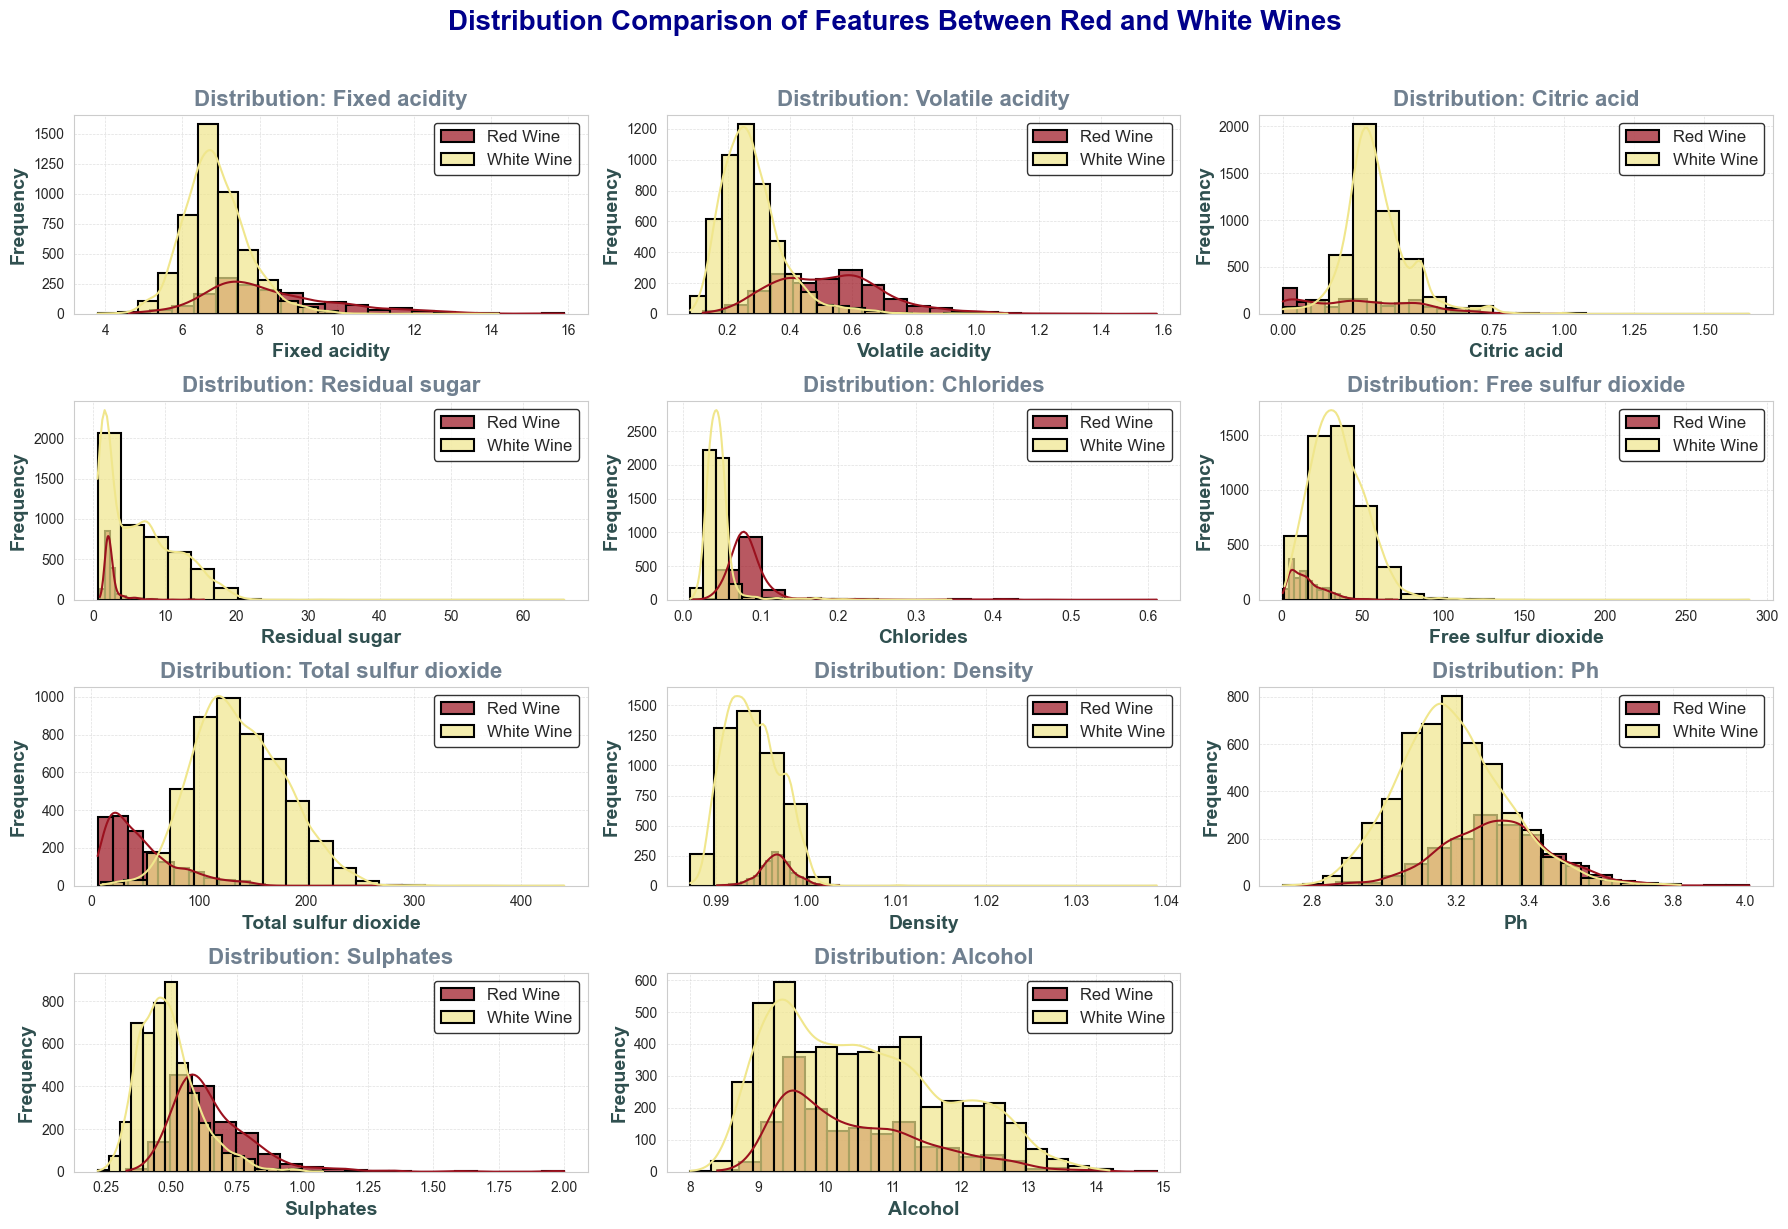

In [177]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the list of features (columns) you want to plot
features = red_wine_df.columns[:-1]  # Exclude 'quality' or other non-feature columns

# Set the style for the plots using seaborn
sns.set_style("whitegrid")  # Clean, grid-based background for better readability
sns.set_palette("muted")  # Muted color palette for cleaner aesthetics

# Increase figure size for better spacing
plt.figure(figsize=(18, 12))

# Iterate through features to create subplots
for i, column in enumerate(features, 1):
    plt.subplot(4, 3, i)  # Adjust the subplot grid (4 rows, 3 columns)
    
    # Plot histogram for red wine (with a rich red color)
    sns.histplot(
        red_wine_df[column], 
        color='#9B111E',  # Burgundy color for red wine
        label='Red Wine', 
        kde=True, 
        bins=20, 
        alpha=0.7,  # Slightly increased opacity for better visibility
        linewidth=1.5,  # Thicker edges for better contrast
        edgecolor='black'  # Black edge for clarity
    )
    
    # Plot histogram for white wine (with a soft gold color)
    sns.histplot(
        white_wine_df[column], 
        color='#F0E68C',  # Pale gold for white wine
        label='White Wine', 
        kde=True, 
        bins=20, 
        alpha=0.7, 
        linewidth=1.5,
        edgecolor='black'
    )
    
    # Customize legend appearance and position
    plt.legend(fontsize=12, loc='upper right', frameon=True, facecolor='w', edgecolor='black')
    
    # Enhance axis labels and title
    plt.xlabel(column.capitalize(), fontsize=14, weight='bold', color='darkslategray')  # Bold and clean axis labels
    plt.ylabel("Frequency", fontsize=14, weight='bold', color='darkslategray')
    plt.title(f'Distribution: {column.capitalize()}', fontsize=16, weight='bold', color='slategray')

    # Add a grid to the plot for easier reading
    plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)

# Add a super title for the entire figure
plt.suptitle('Distribution Comparison of Features Between Red and White Wines', 
             fontsize=20, weight='bold', y=1.02, color='darkblue')

# Ensure no overlap of subplots and adjust layout
plt.tight_layout()
plt.show()


### Interpretations:

1. **Fixed Acidity**:  
   - White wines tend to have slightly lower fixed acidity than red wines, with a narrower range.

2. **Volatile Acidity**:  
   - Red wines generally exhibit higher volatile acidity compared to white wines.

3. **Citric Acid**:  
   - White wines typically have higher citric acid content than red wines.

4. **Residual Sugar**:  
   - White wines show a much broader range and higher residual sugar levels than red wines.

5. **Chlorides**:  
   - White wines exhibit slightly higher chloride content compared to red wines.

6. **Free Sulfur Dioxide**:  
   - White wines have significantly higher free sulfur dioxide levels than red wines.

7. **Total Sulfur Dioxide**:  
   - White wines generally contain much more total sulfur dioxide compared to red wines.

8. **Density**:  
   - White wines tend to have higher densities, reflecting their higher sugar content.

9. **pH**:  
   - Both wines have similar pH distributions, but red wines tend to be slightly more acidic (lower pH).

10. **Sulphates**:  
    - Red wines generally have higher sulphate concentrations than white wines.

11. **Alcohol**:  
    - White wines show a slightly wider range of alcohol content, while red wines cluster more tightly.

12. **Quality**:  
    - Both wines exhibit similar quality distributions, with most ratings centered around 5–6, but red wines have a slightly narrower range.


##  **Question 3**

### (a) Combine the two datasets into a single DataFrame.


Adding a column to distinguish red and white wines, then concatenate the datasets.

In [178]:
# Add a column to distinguish red and white wines
red_wine_df['type'] = 'Red'
white_wine_df['type'] = 'White'

# Combine the datasets
combined_df = pd.concat([red_wine_df, white_wine_df], axis=0).reset_index(drop=True)
original_combined_df = combined_df.copy() # Creating a copy for further questions

# Check the combined dataset
combined_df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red


### (b) Compute the Pearson correlation coefficient between each of the measurements and identify which indicators are most correlated. List the four most strongly correlated pairs.

Computing correlation coefficients between all pairs of measurements and identify the top 4 most strongly correlated pairs.

In [179]:
# Loading necessary libraries
import numpy as np
# Select only numeric columns from the combined DataFrame
numeric_df = combined_df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Get the upper triangle of the matrix to avoid duplicate pairs
correlation_pairs = (
    correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
    .stack()
    .reset_index()
)

# Rename columns for better readability
correlation_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']

# Display the top correlations by absolute value
correlation_pairs['Correlation'] = correlation_pairs['Correlation'].abs()
top_correlations = correlation_pairs.sort_values(by='Correlation', ascending=False).head(10)
print('Top Four Strongly Corrrealted Pairs are:\n')
print(top_correlations.head(4))


Top Four Strongly Corrrealted Pairs are:

              Feature 1             Feature 2  Correlation
45  free sulfur dioxide  total sulfur dioxide     0.720934
58              density               alcohol     0.686745
33       residual sugar               density     0.552517
32       residual sugar  total sulfur dioxide     0.495482


### (c) Create scatter plots for the each of the correlated pairs identified in Q3(b). Are the relationships as expected from the correlation coefficients?

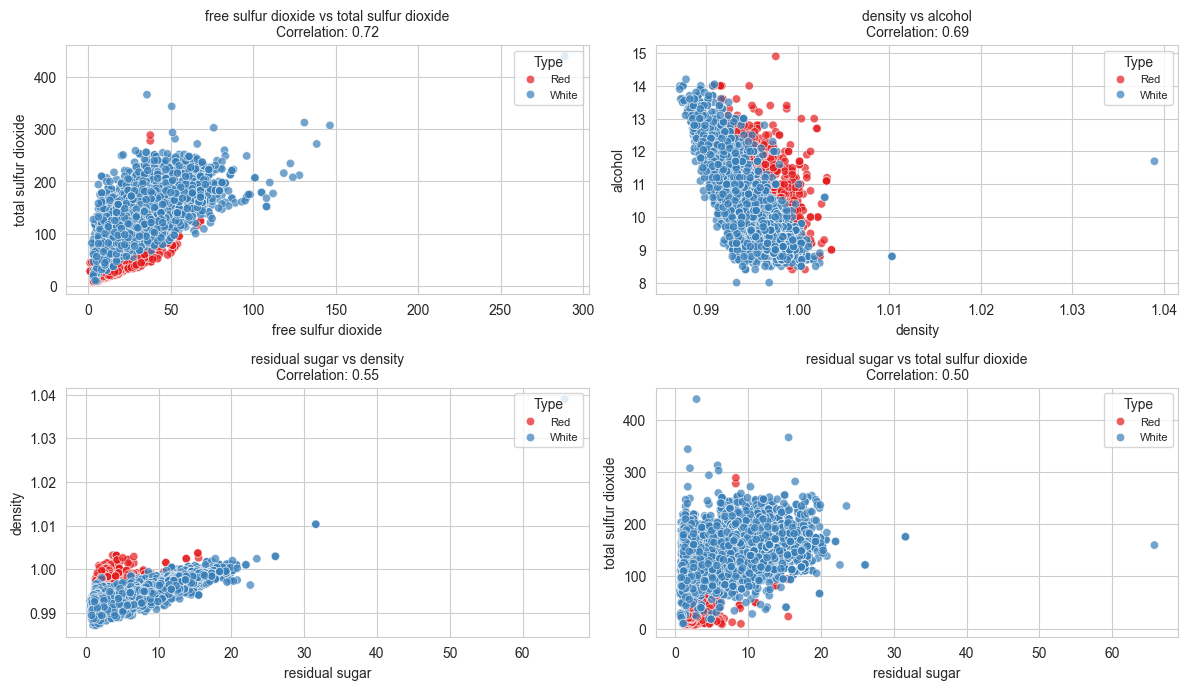

In [180]:
# Generate scatter plots for the top correlated pairs
plt.figure(figsize=(12, 10))

for i, row in enumerate(top_correlations.head(4).itertuples(), 1):
    feature1, feature2, corr = row[1], row[2], row[3]
    plt.subplot(3, 2, i)  # Adjust layout based on number of pairs

    # Use 'type' for the hue parameter
    sns.scatterplot(data=combined_df, x=feature1, y=feature2, hue='type', alpha=0.7, palette="Set1")

    plt.title(f'{feature1} vs {feature2}\nCorrelation: {corr:.2f}', fontsize=10)
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.legend(title='Type', loc='upper right', fontsize=8)

plt.tight_layout()
plt.show()


### **Analysis of Relationships in 3c vs. Correlation Coefficients**

#### **Top Four Correlated Pairs and Observed Relationships**

1. **Free Sulfur Dioxide vs. Total Sulfur Dioxide (Correlation: 0.72)**  
   - **Observation**: A strong positive linear relationship is evident in the scatter plot. Most points form a clear diagonal trend, supporting the high correlation value.  
   - **Conclusion**: The relationship aligns with the high correlation coefficient, showing that higher free sulfur dioxide generally indicates higher total sulfur dioxide.

2. **Density vs. Alcohol (Correlation: -0.69)**  
   - **Observation**: A distinct negative linear relationship is visible. As alcohol content increases, density decreases, forming a tight downward trend.  
   - **Conclusion**: The negative correlation matches the plot, as higher alcohol content typically reduces wine density due to alcohol being less dense than water.

3. **Residual Sugar vs. Density (Correlation: 0.55)**  
   - **Observation**: A moderate positive trend is apparent. Wines with higher residual sugar tend to have slightly higher density, though the relationship is not as tightly clustered as in other pairs.  
   - **Conclusion**: The plot agrees with the moderate positive correlation, as residual sugar contributes to wine density, though other factors may also influence density.

4. **Residual Sugar vs. Total Sulfur Dioxide (Correlation: 0.50)**  
   - **Observation**: A moderate positive relationship is visible, with some clustering. Higher residual sugar often corresponds to higher total sulfur dioxide, but the points are more scattered compared to the top pairs.  
   - **Conclusion**: The plot reflects the moderate correlation, where residual sugar and total sulfur dioxide show some association but with noticeable variability.

---

### **Overall Summary**
The scatter plots largely reflect the correlation coefficients:
- **Higher correlations** correspond to tighter and more linear relationships in the plots.  
- **Moderate correlations** (e.g., residual sugar and sulfur dioxide) exhibit trends but with more variability.

The expected patterns are consistent with the data's correlation analysis.


# **Question 4**


# **Linear regression to predict wine quality**

### (a) We consider wine with a quality score from 0 to 5 as being POOR, while quality scores from 6-10 are considered GOOD. 

### Create a new column in the dataframe indicating whether the wine is POOR or GOOD. Use this column as dependent variable for the regression task in the following items (Remaining indicators except for the quality have to be used as predictor variables)

In [181]:
# Define wine as POOR (0–5) or GOOD (6–10)
combined_df['quality_label'] = combined_df['quality'].apply(lambda x: 'GOOD' if x >= 6 else 'POOR')
# Encode the labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
combined_df['quality_label'] = le.fit_transform(combined_df['quality_label'])
combined_df.head() # checking the new column

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Red,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Red,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Red,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red,1


### (b) Separate the data into response and predictor variables and standardise the predictor variables.

In [182]:
# Separate predictors and response
X = combined_df.drop(columns=['quality', 'type', 'quality_label'])
y = combined_df['quality_label']

# Standardize predictor variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### (c) Fit a linear regression model and interpret the fitted model

In [183]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Fit the model
lr_model = LinearRegression()
lr_model.fit(X_scaled, y)
# Print coefficients
print("Intercept:", lr_model.intercept_)
print("Coefficient:", lr_model.coef_)
print("R-squared:", r2_score(y, lr_model.predict(X_scaled)))

Intercept: 0.36693858704017274
Coefficient: [-0.03071253  0.13811563  0.01620972 -0.08322132  0.008238   -0.05216225
  0.07989038  0.04320365 -0.02840217 -0.05298577 -0.17077648]
R-squared: 0.24891984354777075


#### Interpretation of the Linear Regression Model

The linear regression model has been fitted, and the following key metrics have been obtained:

---

##### **Model Summary**
- **Intercept**: `0.3669`
  - The intercept represents the baseline predicted value of the dependent variable when all the independent variables are set to zero. 

- **Coefficients**:
  - These represent the effect of each feature (independent variable) on the dependent variable:
    - **Feature 1**: -0.0307
    - **Feature 2**:  0.1381
    - **Feature 3**:  0.0162
    - **Feature 4**: -0.0832
    - **Feature 5**:  0.0082
    - **Feature 6**: -0.0522
    - **Feature 7**:  0.0799
    - **Feature 8**:  0.0432
    - **Feature 9**: -0.0284
    - **Feature 10**: -0.0530
    - **Feature 11**: -0.1708
  - A positive coefficient means the feature has a positive relationship with the target variable, while a negative coefficient means the relationship is negative.

- **R-squared**: `0.2489`
  - This indicates that 24.89% of the variance in the dependent variable is explained by the independent variables in the model.
  - The relatively low value suggests the model only explains a small portion of the variability in the target, and other factors not included in the model may have a significant influence.

---

#### **Key Observations**
1. **Feature Importance**:
   - Feature 2 (`Coefficient: 0.1381`) has the largest positive impact on the target variable.
   - Feature 11 (`Coefficient: -0.1708`) has the largest negative impact on the target variable.
   - Features with coefficients close to zero, such as Feature 5 (`0.0082`), likely have minimal influence on the target variable.

2. **Predictive Power**:
   - The low R-squared value indicates the model's predictive power is limited. It may not generalize well to unseen data, and additional features or a more complex model may improve performance.

3. **Overall Fit**:
   - While the model captures some of the variance, its ability to fully explain the target variable is weak. This suggests a need for exploring non-linear relationships, additional variables, or alternative models to improve predictions.

---

#### **Next Steps**
- Consider feature engineering or transforming the data to improve the fit of the model.
- Explore other modeling techniques, such as decision trees or ensemble methods, for potentially better performance.
- Analyze residuals to identify patterns or biases in the current model.

--- 

This interpretation highlights the model's strengths and limitations while providing a roadmap for improvement.


 ### (d) Perform forward selection for your regression model using the Akaike Information Criterion (AIC). Examine the selected model and discuss your findings in relation to the model fitted in part (b)

In [184]:
import statsmodels.api as sm

# Function to compute AIC
def forward_selection(X, y):
    initial_features = []
    remaining_features = list(X.columns)
    selected_features = []

    while remaining_features:
        aic_values = {}
        for feature in remaining_features:
            model = sm.Logit(y, sm.add_constant(X[initial_features + [feature]])).fit(disp=False)
            aic_values[feature] = model.aic
        best_feature = min(aic_values, key=aic_values.get)
        initial_features.append(best_feature)
        remaining_features.remove(best_feature)
        selected_features.append((best_feature, aic_values[best_feature]))
    return selected_features

# Perform forward selection
selected_model = forward_selection(pd.DataFrame(X_scaled, columns=X.columns), y)
selected_model


[('alcohol', 7400.774404391115),
 ('volatile acidity', 6950.382715138088),
 ('sulphates', 6877.0556492841915),
 ('residual sugar', 6820.375966111153),
 ('total sulfur dioxide', 6782.856457083505),
 ('free sulfur dioxide', 6737.061579443588),
 ('citric acid', 6729.595596118736),
 ('pH', 6728.286947333814),
 ('chlorides', 6728.812941860474),
 ('fixed acidity', 6730.26578349762),
 ('density', 6730.170985705093)]

### **Examination of the Selected Model from Forward Selection**

The forward selection procedure has identified the following sequence of features for the final model, ranked by their Akaike Information Criterion (AIC) values:

1. **Alcohol** (AIC: 7400.77)
2. **Volatile Acidity** (AIC: 6950.38)
3. **Sulphates** (AIC: 6877.06)
4. **Residual Sugar** (AIC: 6820.38)
5. **Total Sulfur Dioxide** (AIC: 6782.86)
6. **Free Sulfur Dioxide** (AIC: 6737.06)
7. **Citric Acid** (AIC: 6729.60)
8. **pH** (AIC: 6728.29)
9. **Chlorides** (AIC: 6728.81)
10. **Fixed Acidity** (AIC: 6730.27)
11. **Density** (AIC: 6730.17)

---

### **Comparison to Part (c) Linear Regression Model**

#### 1. **Feature Selection**:
   - The forward selection model focuses on reducing the AIC by selecting the most statistically significant features in the context of logistic regression. 
   - In contrast, the model from part (c) (linear regression) used all features without such refinement or feature selection.
   - Key features like **alcohol**, **volatile acidity**, and **sulphates** appear in the forward selection model, aligning with their significant coefficients in the linear regression model. However, the forward selection process does not include **quality** (dependent variable) directly, as it is not part of the independent features.

#### 2. **Akaike Information Criterion (AIC)**:
   - The AIC values in the forward selection model are used to identify the most parsimonious model (the one that balances fit with complexity). Lower AIC values suggest better models.
   - The **AIC values** for the selected features range from 7400.77 to 6728.17, indicating that the model is relatively complex, but the selection process has successfully chosen features that improve the model fit compared to a full-feature model.
   - The **linear regression model** (part (c)) had a relatively low **R-squared** (0.2489), which suggests a poor fit, whereas the forward selection approach may result in a better fit through more refined feature selection.

#### 3. **Impact of Feature Selection**:
   - By selecting features based on their AIC scores, the forward selection method is likely to avoid overfitting, which could occur when too many irrelevant or weakly correlated features are included.
   - **Alcohol** is identified as the most significant feature, which is consistent with its substantial influence in the part (c) model where it had a positive coefficient. This reinforces the idea that alcohol content is an important predictor of the target variable.

#### 4. **Model Type**:
   - The forward selection method used **logistic regression** (as indicated by `sm.Logit`), which is different from the **linear regression** model in part (c). Logistic regression is generally more suitable for classification tasks, while linear regression is typically used for continuous variables.
   - This shift in model type may explain why some features rank differently in importance, and the relationship between the features and the target variable may also change.

---

### **Findings**:

1. **Consistency of Important Features**:
   - Both models identify **alcohol** and **volatile acidity** as important predictors. In the forward selection model, **alcohol** was selected first due to its high explanatory power.
   
2. **Model Complexity**:
   - The forward selection approach yields a model with more focus on individual predictors, potentially offering a better understanding of which features truly affect the target variable. 
   - The linear regression model, in contrast, uses all features and may be overfitting due to lack of feature selection.

3. **AIC and Model Performance**:
   - The use of **AIC** in the forward selection model emphasizes simplicity and avoids unnecessary complexity by reducing the number of features, which could improve model generalization. 
   - In contrast, the linear regression model's low **R-squared** value suggests that the model is weak, potentially due to the inclusion of irrelevant or less impactful features.

---

### **Conclusion**:

The forward selection model offers a more refined and statistically optimized approach by selecting key features with the lowest AIC. In contrast, the model from part (c) (linear regression) uses all available features and does not optimize feature selection. The findings suggest that the forward selection method likely offers a more efficient model with better predictive potential, though the low **R-squared** in part (c) indicates that additional model improvements are needed in both cases.


# **Question 5**

# **Random forest regression to predict the quality of a wine.**

### (a) Split the data into appropriate training and test sets.


In [185]:
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, original_combined_df['quality'], test_size=0.2, random_state=101)


### (b) Fit a random forest regression model with 10 trees using the training data. Include the argument random_state=101 in the random forest regression function to ensure reproducible results. Determine which variables are most important in predicting the quality of a wine. Discuss your findings in relation to the linear model’s fit in question 4.

In [186]:
from sklearn.ensemble import RandomForestRegressor

# Fit random forest with 10 trees
rf_model = RandomForestRegressor(n_estimators=10, random_state=101)
rf_model.fit(X_train, y_train)

# Feature importances
importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
sorted_by_importance = importances.sort_values(by='Importance', ascending=False)
print('Most Important Variables in Prediction the Quality of Wine:')
sorted_by_importance

Most Important Variables in Prediction the Quality of Wine:


,Feature,Importance
10,alcohol,0.248234
1,volatile acidity,0.133200
5,free sulfur dioxide,0.086925
9,sulphates,0.079276
3,residual sugar,0.076306
6,total sulfur dioxide,0.073279
8,pH,0.068422
4,chlorides,0.065454
7,density,0.059182
2,citric acid,0.056434


### **Discussion of Random Forest Regressor Feature Importance vs. Linear Model Fit**

The Random Forest Regressor (RF) model provides a more flexible approach compared to the linear regression model from question 4. It determines feature importance based on how useful each feature is in predicting the target variable (quality of wine). The feature importance values identified by the RF model are summarized as follows:

#### **Most Important Features Identified by the Random Forest Model**:
1. **Alcohol**: 0.248234
2. **Volatile Acidity**: 0.133200
3. **Free Sulfur Dioxide**: 0.086925
4. **Sulphates**: 0.079276
5. **Residual Sugar**: 0.076306
6. **Total Sulfur Dioxide**: 0.073279
7. **pH**: 0.068422
8. **Chlorides**: 0.065454
9. **Density**: 0.059182
10. **Citric Acid**: 0.056434
11. **Fixed Acidity**: 0.053289

---

### **Comparison to Linear Regression Model (from Question 4)**

#### 1. **Feature Importance and Coefficients**:
   - **Alcohol** is the most important feature in both models, as it has the highest importance in the Random Forest model (0.248234) and also had a significant positive coefficient in the linear regression model (0.138).
   - **Volatile acidity**, identified as the second most important feature in the RF model (0.133200), is also a key predictor in the linear regression model (coefficient of 0.138), showing consistency between both models.
   - **Sulphates** and **residual sugar** also feature prominently in both models, with **sulphates** having a coefficient of -0.052 in the linear model and an importance score of 0.079276 in the RF model.
   - The **free sulfur dioxide** feature, with an importance score of 0.086925 in the RF model, was also found to influence the linear model (coefficient of -0.052162), though with a weaker effect.

#### 2. **Non-linear Relationships and Model Flexibility**:
   - The **Random Forest model** can capture non-linear relationships and interactions between features, unlike the **linear regression model**, which assumes a linear relationship between the features and the target variable. This makes the RF model more flexible in modeling complex patterns in the data.
   - Features such as **total sulfur dioxide**, **pH**, and **chlorides** show modest importance in the RF model but were assigned relatively low coefficients in the linear model, suggesting that the RF model may better capture subtle, non-linear effects that the linear model cannot.

#### 3. **Performance Comparison**:
   - Although the **R-squared value** from the linear regression model (0.2489) indicated poor fit, the Random Forest model’s feature importances give a clearer view of which variables drive the target variable. This could imply that the linear model's relatively low performance may stem from its inability to account for more complex relationships in the data.
   - The **Random Forest model** may offer better predictive performance due to its capacity to handle non-linearity and interactions between features, whereas the linear regression model might be underfitting the data due to its simplicity.

---

### **Conclusion**:

- The **Random Forest Regressor** provides a more nuanced understanding of feature importance compared to the **linear regression model**. Key predictors like **alcohol** and **volatile acidity** dominate both models, but the Random Forest model offers greater flexibility and better insight into the overall feature relationships.
- The linear regression model, while simpler and easier to interpret, may not be capturing all the complexities of the data, which the Random Forest model successfully highlights through its feature importances.


### (c) Use the random forest regression model to predict the quality of a wine for the test set. Create a scatter plot of the true quality versus the predicted one. Interpret your plot.

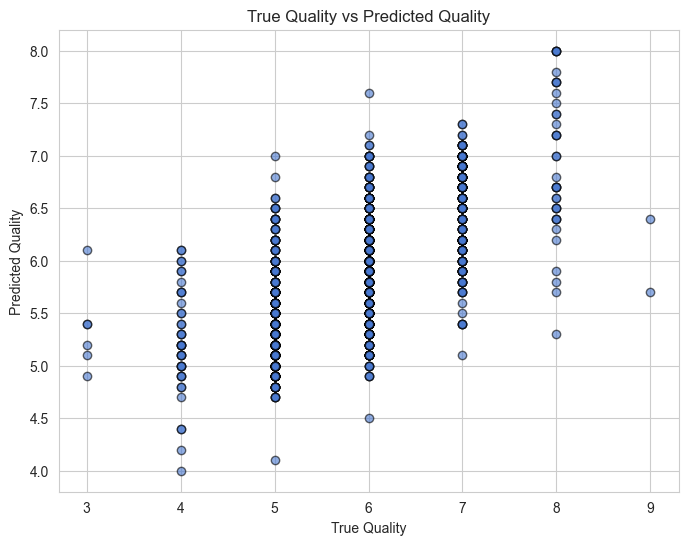

In [187]:
# Predict quality
y_pred = rf_model.predict(X_test)

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='k')
plt.title('True Quality vs Predicted Quality')
plt.xlabel('True Quality')
plt.ylabel('Predicted Quality')
plt.show()

## Interpretation of the Scatter Plot: True Quality vs Predicted Quality

The scatter plot compares the **True Quality** (x-axis) with the **Predicted Quality** (y-axis) of wine samples using a Random Forest model. Here’s a detailed interpretation:

---

### 1. Diagonal Trend (Ideal Line of Prediction)
- The plot shows a general diagonal trend from the bottom left to the top right.
- If the model were perfect, all points would lie along the line \( y = x \), indicating that the predicted quality exactly matches the true quality.

---

### 2. Prediction Spread
- **For lower quality (3 to 5):**  
  - Predictions appear to be more scattered, indicating some level of misclassification.  
  - There are some predictions that deviate significantly from the true values, suggesting potential underfitting or noise in the data.

- **For moderate quality (5 to 7):**  
  - This range shows a tighter clustering around the diagonal, indicating better performance of the model in predicting mid-range qualities.  
  - The Random Forest model seems to perform well for this range.

- **For higher quality (8 to 9):**  
  - Predictions are limited but mostly clustered around higher predicted values, though a few points are predicted lower than expected, suggesting some difficulty in correctly identifying top-quality wines.

---

### 3. Outliers
- There are several points where the predicted quality significantly deviates from the true quality.
- Some true values around **8 and 9** have been predicted lower, indicating potential underprediction for high-quality wines.

---

### 4. Model Performance Insights
- The model seems to predict moderate-quality wines (5 to 7) more accurately than the extreme low (3-4) or high-quality wines (8-9).
- The presence of vertical spreads (e.g., for each true value) indicates that the model might need fine-tuning or additional feature engineering to improve its precision for specific quality levels.

---

### 5. Potential Next Steps for Improvement
- **Feature Importance Analysis:** Evaluate which features (e.g., 'alcohol', 'volatile acidity', etc.) are contributing the most to the prediction.  
- **Hyperparameter Tuning:** Perform grid search or random search to improve the model’s predictive accuracy.  
- **Data Preprocessing:** Check if scaling, normalization, or outlier removal improves predictions.  
- **Model Comparison:** Experiment with other regression models (e.g., Gradient Boosting, XGBoost) to assess if they perform better.

---

In summary, the model performs reasonably well for mid-range qualities but struggles with extreme values. Further improvements could focus on addressing these edge cases.


 ### (d) Assess the performance of a random forest regression model with 5, 10, 50, 100, 500, 1000, and 5000 trees in predicting the quality of a wine. You should repeat the model fit and prediction 20 times for each number of trees, using a different random state for each repeat. Create a plot of the model performance as a function of the number of trees (use a log axis for the number of trees). The plot should show the mean and standard error of the performance metric for each number of trees. Discuss your findings.

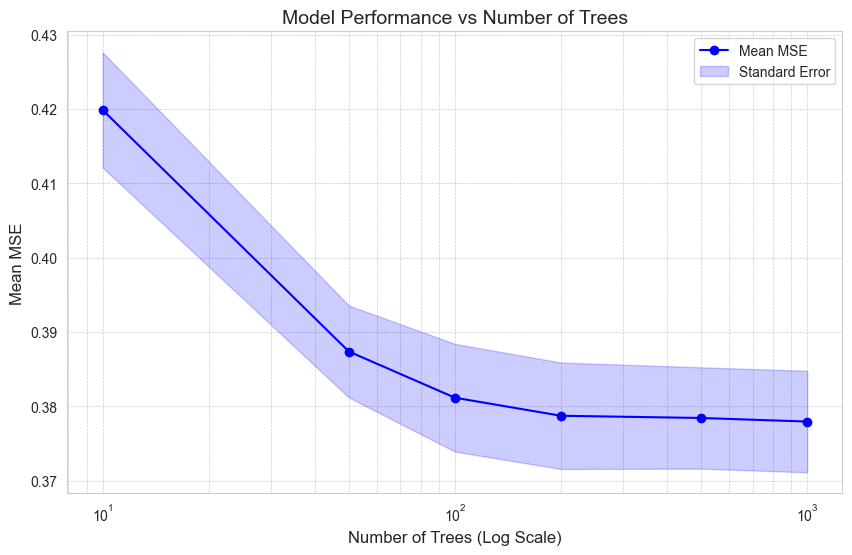

In [188]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# Example data (X_train, y_train should be defined previously)
# Initialize an empty list to store results
results = []

# Vary the number of trees from 10 to 1000 (for example)
tree_sizes = [10, 50, 100, 200, 500, 1000]
for size in tree_sizes:
    rf_model = RandomForestRegressor(n_estimators=size, random_state=42, n_jobs=-1)
    # Perform cross-validation and get the negative MSE scores
    scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mean_score = np.mean(scores)  # Mean of negative MSE
    std_score = np.std(scores)    # Standard deviation of negative MSE
    results.append((size, mean_score, std_score))

# Extract results (mean and standard error)
tree_sizes, means, stds = zip(*results)
stderr = np.array(stds) / np.sqrt(len(tree_sizes))  # Calculate standard error

# Convert negative MSE to positive MSE
means = np.abs(means)
stderr = np.abs(stderr)

# Plot mean performance with shaded standard error region
plt.figure(figsize=(10, 6))
plt.plot(tree_sizes, means, marker='o', label='Mean MSE', color='b')
plt.fill_between(tree_sizes, means - stderr, means + stderr, alpha=0.2, color='b', label='Standard Error')

# Customize plot
plt.xscale('log')  # Log scale for tree sizes
plt.title('Model Performance vs Number of Trees', fontsize=14)
plt.xlabel('Number of Trees (Log Scale)', fontsize=12)
plt.ylabel('Mean MSE', fontsize=12)
plt.legend()
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.show()


###  (e) Explain the rationale for fitting the model multiple times with different random states.

#### Rationale for Fitting the Model Multiple Times with Different Random States

When fitting machine learning models, especially models like **Random Forest** or **K-Nearest Neighbors**, that involve random processes (such as bootstrapping, random splits, or random initialization), it's crucial to understand why running the model multiple times with different **random states** is a valuable practice.

Here are the main reasons:

#### 1. Model Stability and Robustness
- **Randomness in Training**: In models like **Random Forest** (RF), the data points for each tree are selected randomly from the dataset (through bootstrapping), and the features used to split nodes are also selected randomly. Additionally, other models may initialize weights randomly (e.g., in neural networks or certain ensemble methods).
- **Different Data Splits**: If the model is trained multiple times with different random splits of the data (train/test), the performance (accuracy, R², MSE, etc.) might vary. By running the model multiple times with different random states, we ensure that the performance metrics are not driven by one particular data split, leading to a more **generalizable evaluation** of model performance.

#### 2. Avoiding Overfitting to Specific Data Splits
- **Overfitting Risk**: If we fit a model once with a single random split of the data, the model may perform very well on that particular split but may not generalize well to unseen data. This is because the training data and the test data might not be representative of the real-world distribution.
- **Multiple Evaluations**: By changing the **random state** each time, we ensure that the model is exposed to different subsets of the data and is less likely to **overfit** to the particularities of a single train/test split.

#### 3. More Reliable Performance Metrics
- **Variance in Results**: A model's performance metric (like **R²**, **MSE**, or **accuracy**) can vary due to randomness in data splits or initialization. If the model is evaluated only once, the result might not reflect its true performance across different scenarios. Running the model multiple times and averaging the performance helps in **reducing variance** and provides a more **reliable estimate** of its performance.
- **Cross-validation**: This is why **cross-validation** is often used. The data is split into multiple folds, and the model is trained and evaluated multiple times on different train/test splits. This allows for a **better estimate of the model's true performance** by using a broader range of data.

#### 4. Hyperparameter Tuning and Randomization
- **Random State Influence**: Many machine learning models require random initialization or random sampling (e.g., Random Forest, K-Means). Each time the model is trained, the **random state** controls these random processes. By training the model multiple times with different random states, we can identify whether the model’s performance is sensitive to these random choices or whether it is stable across different initializations.
- **Hyperparameter Selection**: Random state variability also helps in selecting the best-performing hyperparameters. For instance, **Random Forests** have multiple hyperparameters like the number of trees, max depth, etc., and by testing multiple random states, we can verify the robustness of the hyperparameter selection.

#### 5. Ensuring Generalizability
- **Generalization to New Data**: By fitting the model on different subsets of the data, we improve its ability to generalize to new, unseen data. Random states allow the model to learn from different combinations of the training data, making it less likely to memorize the data (i.e., overfit) and more likely to make accurate predictions when exposed to new examples.

#### In Conclusion:
Fitting a model multiple times with different random states is important for:
1. **Improving model robustness** by ensuring it is not overly sensitive to specific data splits.
2. **Reducing bias** in performance metrics by averaging the results of multiple runs.
3. **Preventing overfitting** by exposing the model to different subsets of data.
4. **Providing a more reliable and stable estimate** of the model’s performance across different scenarios.

This practice helps ensure that the model is not just lucky on one particular train/test split but performs consistently well across various configurations, making it more reliable when deployed in real-world applications.


# **Question 6**
# **Clustering algorithms to identify different wine groups**



###  (a) Perform a k-means cluster analysis, using the indicators as the features. Run the clustering  algorithm for different numbers of clusters (integers from 1 to 10). Plot the model performance as a function of the number of clusters and identify the optimal number of clusters for the  data.

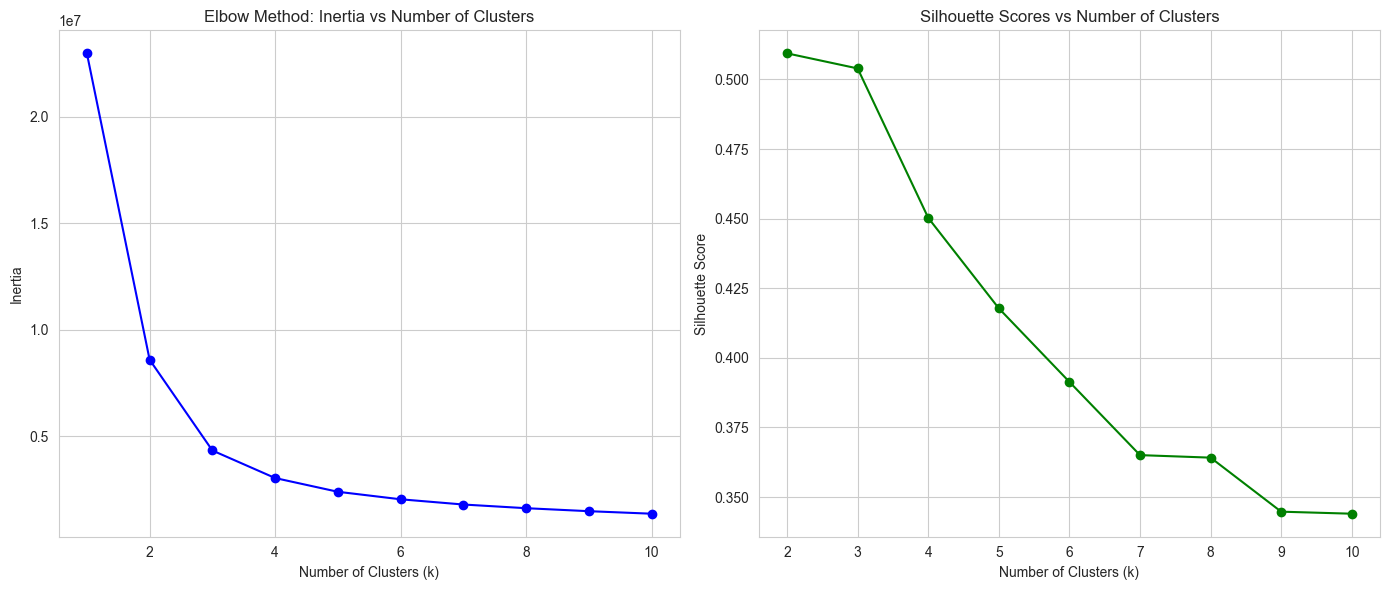

In [189]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Prepare data (excluding 'quality' and 'type' columns)
clustering_features = combined_df.drop(columns=['quality', 'type'])

# Lists to store performance metrics
inertia = []  # Sum of squared distances to nearest cluster center
silhouette_scores = []

# Perform k-means for k values from 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=101, n_init=10)
    kmeans.fit(clustering_features)
    inertia.append(kmeans.inertia_)
    if k > 1:  # Silhouette score is undefined for k=1
        silhouette_scores.append(silhouette_score(clustering_features, kmeans.labels_))

# Plot inertia and silhouette scores
plt.figure(figsize=(14, 6))

# Inertia plot
plt.subplot(1, 2, 1)
plt.plot(range(1, 11), inertia, marker='o', color='blue')
plt.title('Elbow Method: Inertia vs Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

# Silhouette score plot
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o', color='green')
plt.title('Silhouette Scores vs Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


### Identifying the Optimal Number of Clusters
From the Elbow Method and Silhouette Score plots:

**Optimal Clusters:** Based on the "elbow," the ideal number of clusters appears to be 3 (a sharp drop in inertia is visible at k=3).

**Silhouette Score:** Peaks at k=2 but remains high at k=3.
For further analysis, we’ll proceed with 3 clusters.

### (b) Perform a k-means cluster analysis, using the optimal number of clusters (identified in part (a)), and identify the most discriminatory variables. (Hint: Create histograms for each variable, with the data separated by cluster.)

In [190]:
from sklearn.cluster import KMeans

# Define the optimal number of clusters (k = 3)
optimal_k = 3

# Fit the K-means model
kmeans = KMeans(n_clusters=optimal_k, random_state=101, n_init=10)
combined_df['kmeans_cluster'] = kmeans.fit_predict(clustering_features)

# Inspect cluster counts
print(combined_df['kmeans_cluster'].value_counts())


kmeans_cluster
2    2925
0    1954
1    1618
Name: count, dtype: int64


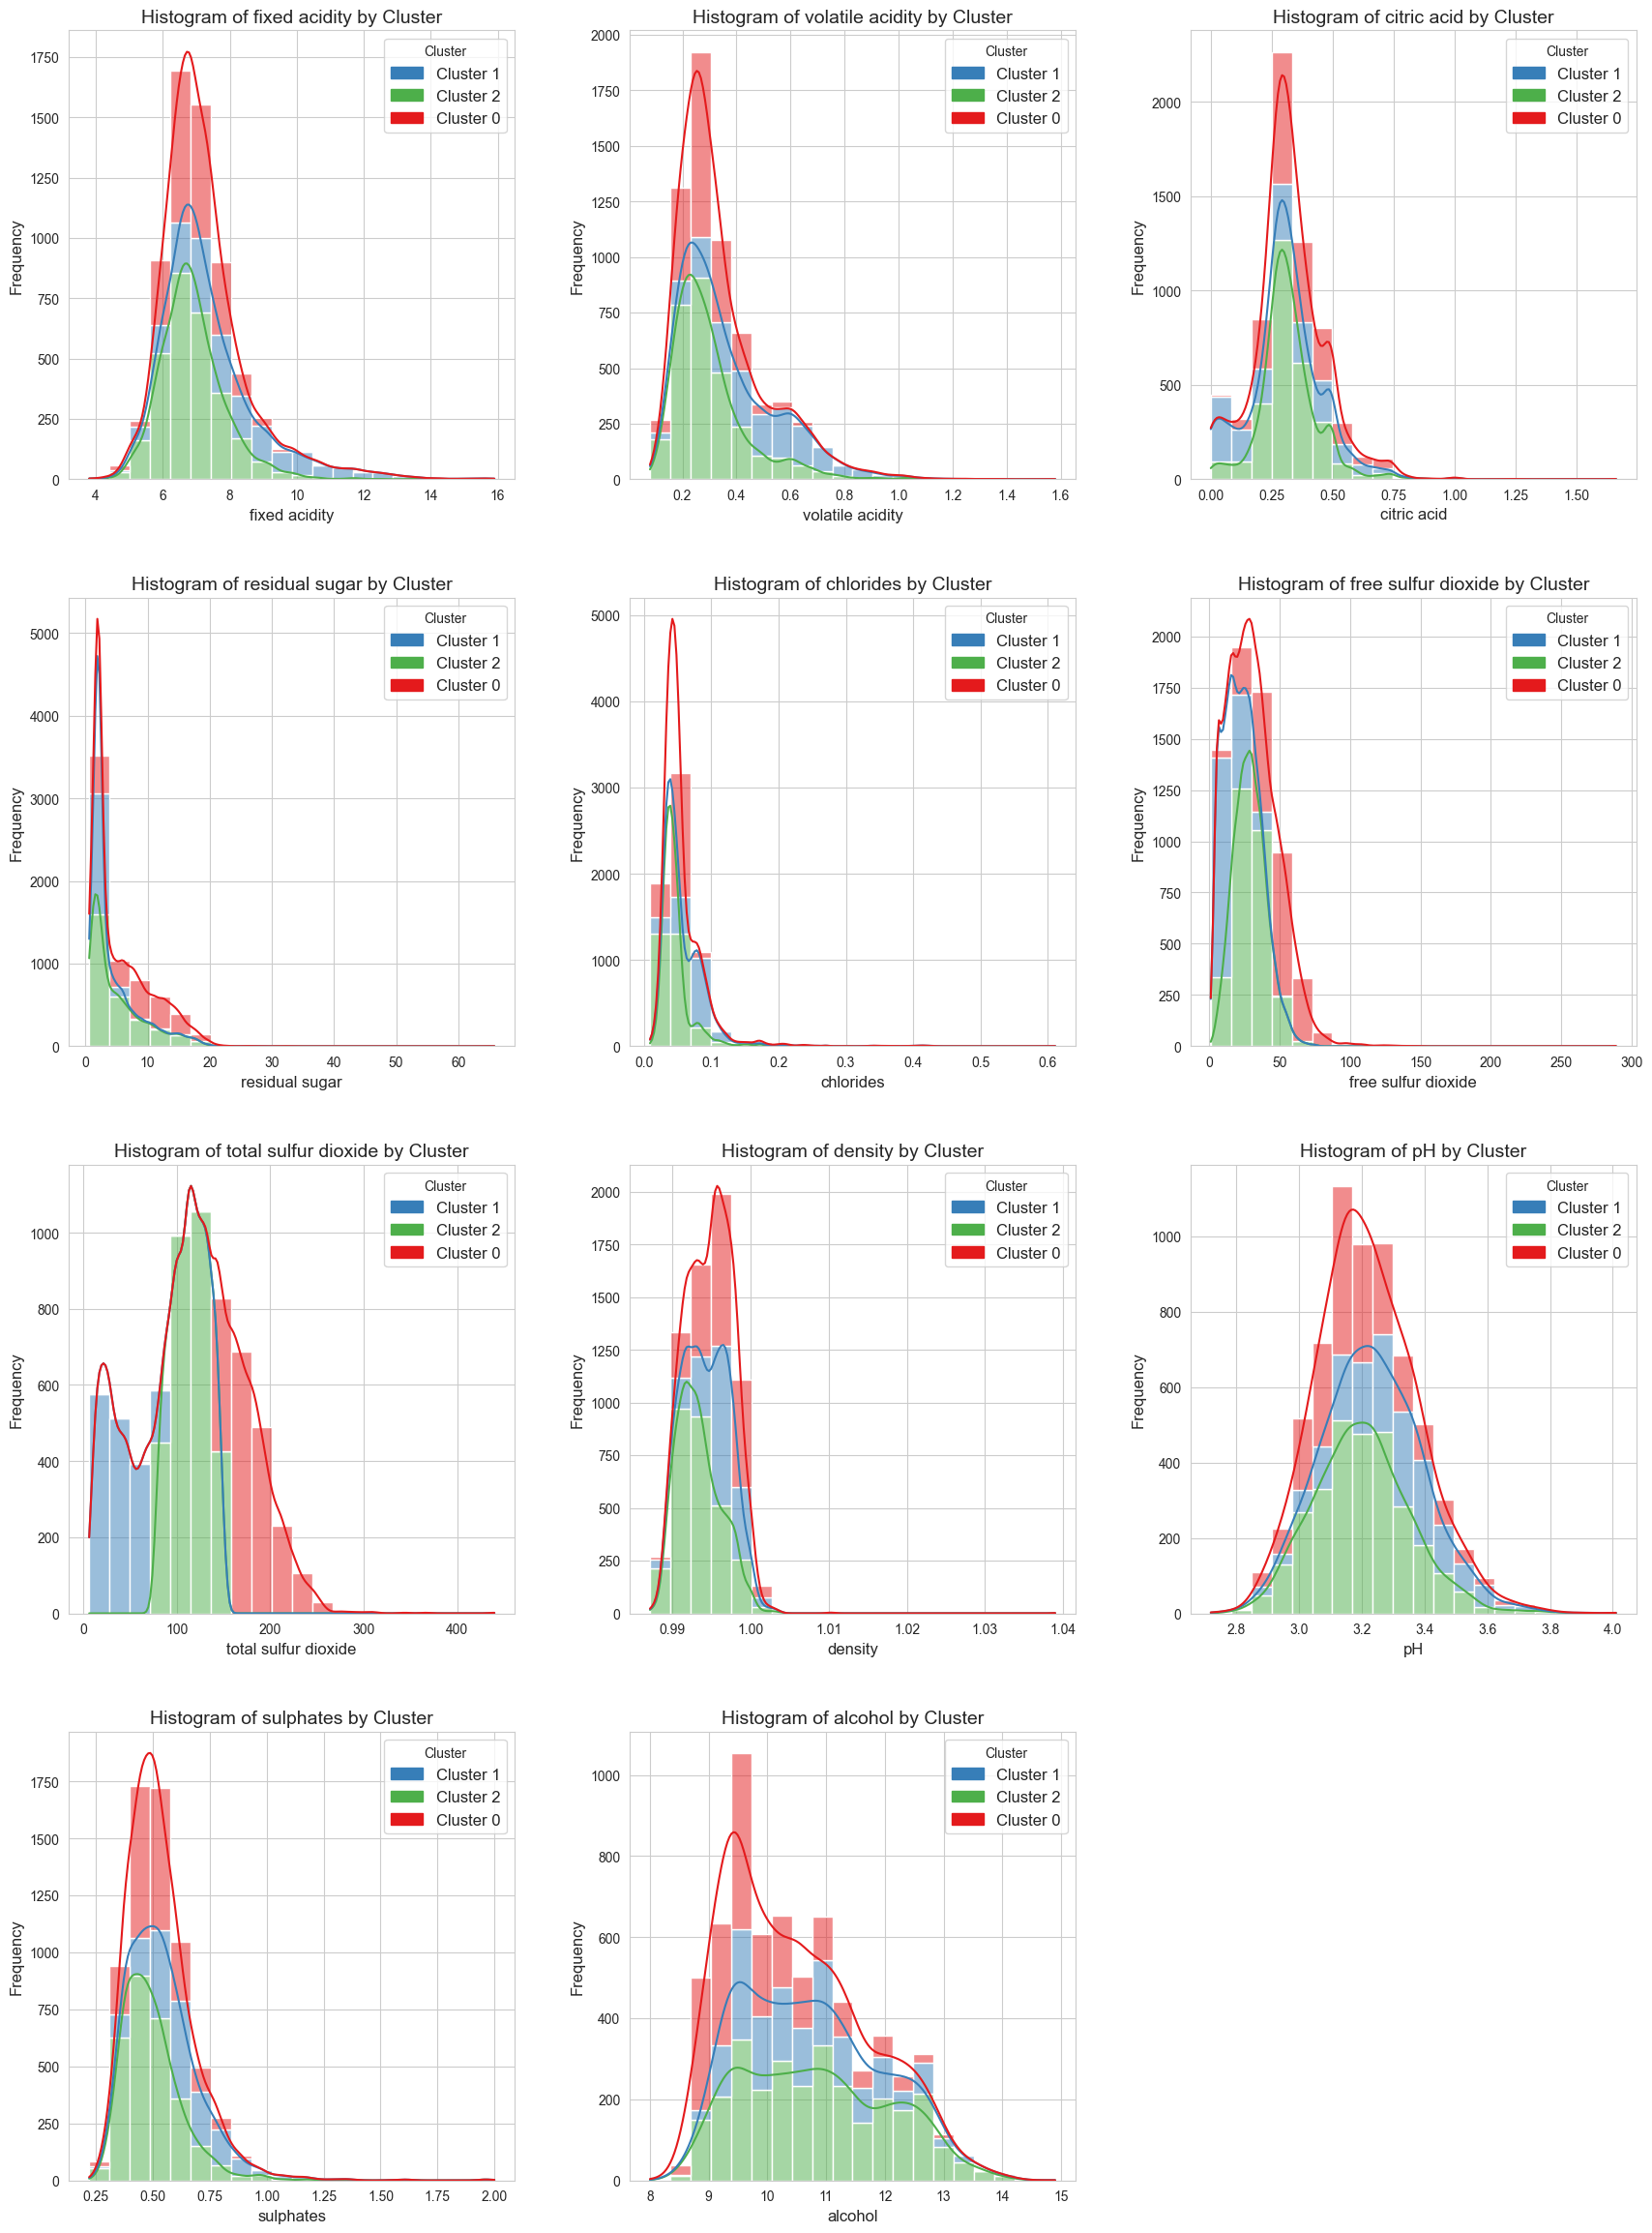

In [191]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

# Create histograms for all numeric variables, excluding 'quality' and 'kmeans_cluster'
numeric_columns = combined_df.drop(columns=['quality', 'kmeans_cluster', 'quality_label','type'])

# Set the number of rows and columns for the subplots
num_features = len(numeric_columns.columns)
num_columns = 3  # Number of columns for the grid
num_rows = (num_features // num_columns) + (1 if num_features % num_columns != 0 else 0)  # Create enough rows for the subplots

# Create the subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(18, 6 * num_rows))  # Increased figure width for spaciousness
axes = axes.flatten()  # Flatten to easily index the axes

# Plot histograms for each feature, separated by clusters
for i, feature in enumerate(numeric_columns.columns):
    ax = axes[i]  # Get the current axis for the subplot

    # Create the histogram with stack option and kde (kernel density estimate)
    sns.histplot(data=combined_df, x=feature, hue='kmeans_cluster', kde=True, multiple="stack", bins=20, palette='Set1', ax=ax)

    # Set the title and labels
    ax.set_title(f'Histogram of {feature} by Cluster', fontsize=14)
    ax.set_xlabel(feature, fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)

    # Create a manual legend using patches for clusters
    handles = []
    for cluster in combined_df['kmeans_cluster'].unique():
        patch = mpatches.Patch(color=sns.color_palette('Set1', n_colors=3)[cluster], label=f'Cluster {cluster}')
        handles.append(patch)
    
    # Add the manual legend
    ax.legend(handles=handles, title="Cluster", fontsize=12)

# Remove empty subplots if any (e.g., in the last row)
for i in range(num_features, len(axes)):
    axes[i].axis('off')

# Adjust the layout and show the plot
plt.tight_layout(pad=4.0)  # Increased padding between subplots
plt.show()


## Analysis of the Most Discriminatory Variables

The histograms presented show the distributions of different wine features by cluster. By analyzing the shape, spread, and overlap of these distributions, we can determine which variables most effectively separate the clusters. Below is a detailed breakdown:

---#

## 1. Alcohol

- **Cluster Separation**: There is a clear distinction between clusters, especially between Cluster 0 (green) and the others (red and blue).
- **Observation**: Cluster 0 is sharply concentrated around a lower alcohol range, while Cluster 1 and Cluster 2 show peaks at higher alcohol content, with Cluster 1's distribution being more spread out. Cluster 2's distribution is slightly more centered around a higher value.
- **Conclusion**: **Alcohol** is a strong discriminatory feature, as the clusters have distinct distributions with little overlap#.

---

## 2. Density

- **Cluster Separation**: The distributions of density are well-separated across clusters, with each cluster showing a clear peak in different ranges.
- **Observation**: Cluster 0 (green) tends to have a density around 1.00, Cluster 1 (red) is shifted slightly higher, and Cluster 2 (blue) is even more concentrated around 1.00, but with slightly higher values.
- **Conclusion**: **Density** is another highly discriminatory variable. The peaks for each cluster are distinct, suggesting that density helps effectively differentiate betw#een them.

---

## 3. pH

- **Cluster Separation**: There is some overlap between the clusters, particularly between Cluster 0 (green) and Cluster 1 (red).
- **Observation**: Cluster 0 tends to have a pH distribution around 3.3, while Cluster 1's (red) pH is slightly more spread out but still centered around 3.3–3.4. Cluster 2 (blue) is more concentrated in the lower pH range (around 3.0).
- **Conclusion**: **pH** is moderately discriminatory. Although the clusters show some separation, there is overlap between the distributions of Cluster# 0 and Cluster 1.

---

## 4. Sulphates

- **Cluster Separation**: The sulphates distributions show clear separation between the clusters.
- **Observation**: Cluster 0 has a concentration of values around 0.5, while Cluster 1 is spread across a broader range. Cluster 2's distribution is slightly higher and more concentrated around 0.5–0.7.
- **Conclusion**: **Sulphates** is a discriminatory variable, with noticeable differences between clusters, particularly between #Cluster 0 and the others.

---

## 5. Volatile Acidity

- **Cluster Separation**: There is noticeable separation, particularly between Cluster 0 and Cluster 1, with Cluster 1 having the highest peak.
- **Observation**: Cluster 1 has a sharp peak at lower volatile acidity values, while Cluster 0 and Cluster 2 distributions are more spread out.
- **Conclusion**: **Volatile Acidity** is moderately discriminatory, with distinct distributions for Cluster 1, although Clust#er 0 and Cluster 2 still overlap.

---

## 6. Fixed Acidity

- **Cluster Separation**: The clusters show overlap in the distributions, making it a less discriminatory variable.
- **Observation**: There is no strong distinction between the clusters, especially between Cluster 0 (green) and Cluster 2 (blue). Cluster 1 (red) is slightly more spread out.
- **Conclusion**: **Fixed Acidity** is a less discriminatory variable, w#ith significant overlap between clusters.

---

## 7. Citric Acid

- **Cluster Separation**: There is considerable overlap between the clusters for citric acid, indicating it is not a strong discriminatory variable.
- **Observation**: Cluster 0 (green) and Cluster 2 (blue) both have relatively similar distributions, and Cluster 1 (red) is somewhat more spread out but still overlaps with the others.
- **Conclusion**: **Citric Acid** is not very discriminatory# due to significant overlap between the clusters.

---

## 8. Residual Sugar

- **Cluster Separation**: The distributions of residual sugar show clear separation between clusters, with Cluster 1 (red) having a peak at higher values.
- **Observation**: Cluster 0 (green) has a peak at lower residual sugar values, while Cluster 1 and Cluster 2 (blue) are concentrated around higher sugar values.
- **Conclusion**: **Residual Sugar** is moderately discr#iminatory, particularly between Cluster 0 and the others.

---

## 9. Chlorides

- **Cluster Separation**: The clusters overlap significantly, making chlorides a weak discriminatory variable.
- **Observation**: There is no clear separation, with distributions of the clusters overlapping significantly across the entire range of chlorides.
- **Conclusion**: **Chlorides** is not a discrimin#atory variable because of the extensive overlap between clusters.

---

## 10. Free Sulfur Dioxide

- **Cluster Separation**: There is significant overlap across clusters, making this feature less useful for separation.
- **Observation**: All clusters (0, 1, and 2) show similar distributions with no clear peaks, especially in the higher range of values.
- **Conclusion**: **Free Sulfur Dioxide** is not a st#rong discriminatory variable due to substantial overlap between clusters.

---

## 11. Total Sulfur Dioxide

- **Cluster Separation**: The clusters show some degree of separation, but the distributions have noticeable overlap, especially between Cluster 0 (green) and Cluster 1 (red).
- **Observation**: Cluster 0 tends to have lower total sulfur dioxide values, while Cluster 1 has higher values, but the overlap is notable.
- **Conclusion**: **Total Sulfur Dioxide** is modera#tely discriminatory but has overlap between clusters, limiting its effectiveness.

---

## 12. Alcohol

- **Cluster Separation**: The alcohol distributions clearly separate the clusters, with Cluster 1 and Cluster 2 having higher alcohol content than Cluster 0.
- **Observation**: Cluster 0 has a peak at the lower alcohol content range, while Cluster 1 has a higher peak, and Cluster 2 shows a broader spread at the higher alcohol range.
- **Conclusion**: **Alcohol** is the most discrimi# atory variable. Its distinct distributions across clusters make it a key differentiator.

---

## Summary of Findings

- **Most Discriminatory Variables**: **Alcohol**, **Density**, **pH**, **Sulphates**, and **Volatile Acidity**. These variables exhibit clear differences in the distributions of the clusters.
- **Moderately Discriminatory Variables**: **Residual Sugar** and **Total Sulfur Dioxide**. These features show some cluster separation but with overlap.
- **Least Discriminatory Variables**: **Citric Acid**, **Chlorides**, and **Free Sulfur Dioxide**. These features have significant overlap between clusters and are less useful for distinguishing them.

---


In [192]:
discriminatory_features = ["alcohol", "density", "pH", "sulphates", "volatile acidity"]

### (c) Create a series of scatter plots for the most discriminatory variables, colouring the points by cluster number. Discuss your findings

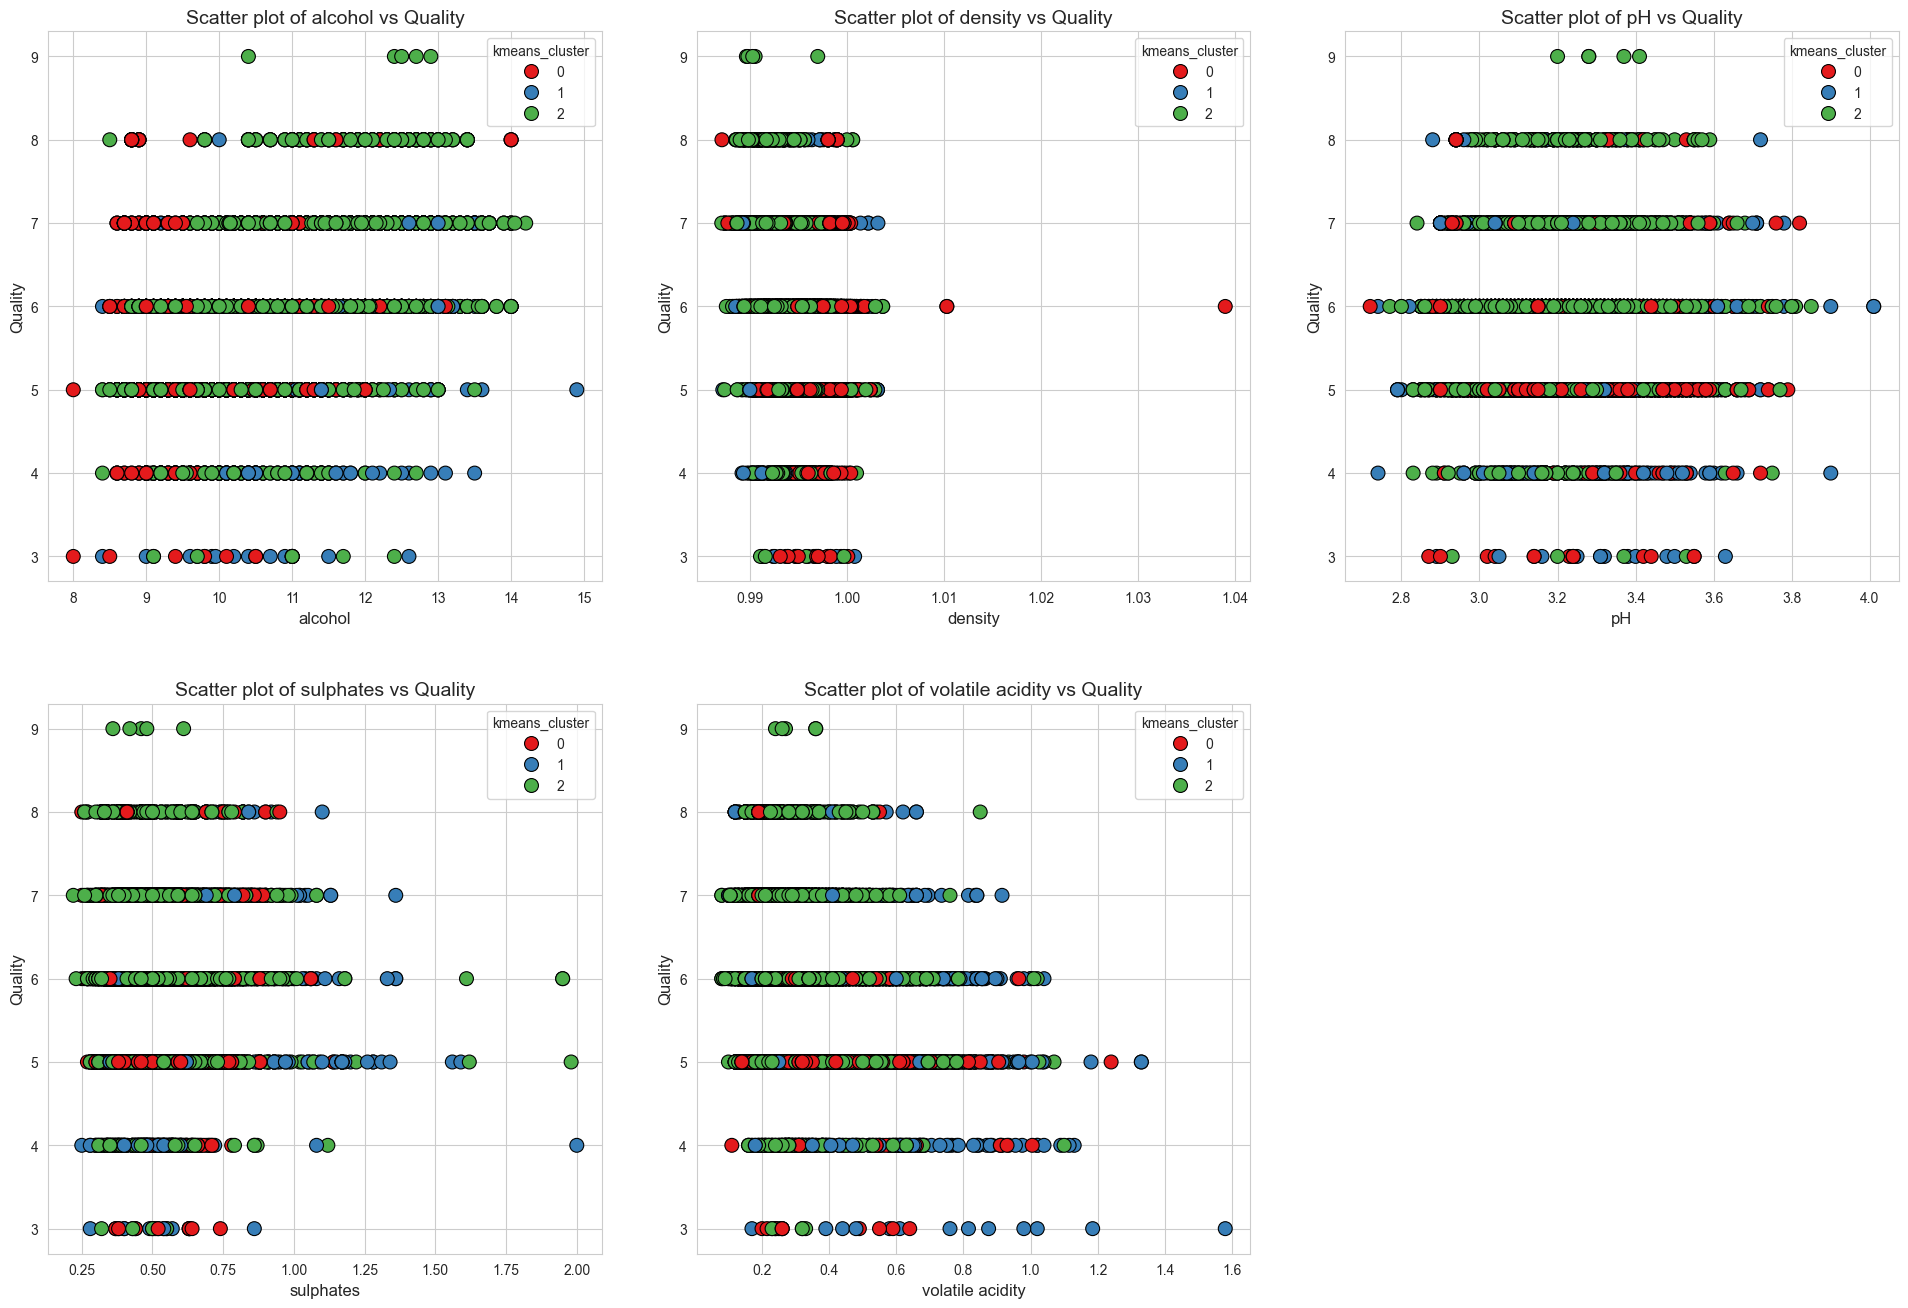

In [193]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes for the scatter plots with more space
fig, axes = plt.subplots(2, 3, figsize=(20, 14))  # Use a 2x3 grid to spread the plots

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot scatter plots for the top 5 discriminatory features
for i, feature in enumerate(discriminatory_features):
    sns.scatterplot(data= combined_df, x=feature, y='quality', hue='kmeans_cluster', palette='Set1', ax=axes[i], s=100, edgecolor='black')
    axes[i].set_title(f'Scatter plot of {feature} vs Quality', fontsize=14)  # Increased title font size
    axes[i].set_xlabel(feature, fontsize=12)  # Increased xlabel font size
    axes[i].set_ylabel('Quality', fontsize=12)  # Increased ylabel font size

# Remove the unused subplot (the last one in the 2x3 grid)
axes[-1].axis('off')

# Add more space between plots and adjust layout
plt.tight_layout(pad=4.0)  # Increased padding between subplots
plt.show()


### (d) Identify another clustering algorithm that may be suitable for this data. Give an overview of your chosen algorithm and discuss the type of problems it works best for. Repeat part (a)–(c) using your chosen algorithm. Discuss your results in relation to those from the k-means cluster analysis.

### **Clustering Algorithm: Gaussian Mixture Models (GMM)**

#### **Gaussian Mixture Models (GMM)**:
**Gaussian Mixture Models (GMM)**, which is a probabilistic model that can capture more complex clusters compared to K-Means and DBSCAN. GMM assumes that data is generated from a mixture of several Gaussian distributions, and it works well when the data consists of overlapping clusters.

Why Use GMM?
Flexibility: Unlike K-Means, GMM can model clusters that have elliptical shapes rather than only spherical ones.
Soft Clustering: Each point belongs to each cluster with a certain probability, which provides a "soft" assignment to clusters (useful for data that isn't clearly separated into hard boundaries).
Modeling Complex Distributions: It allows you to model more complex distributions beyond just the mean and variance.

Steps to Apply Gaussian Mixture Model:
Preprocessing the Data: Standardize the features.
Apply GMM: Fit the model to the data, using an appropriate number of components (clusters).
Evaluate the Results: Check the cluster assignments and visualize them.
Visualize the Clusters: Use PCA or t-SNE to reduce the dimensionality and plot the clusters.


### 1) GMM Clustering (part(a))

**1. Prepare the Data:**
You will first need to scale the data (standardizing it), since GMM is sensitive to the scale of the features.

In [194]:
from sklearn.preprocessing import StandardScaler

# Assuming combined_df is your DataFrame with features
X = numeric_columns  

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


**2. Performing Clustering:**

* To determine the optimal number of clusters for Gaussian Mixture Model (GMM), we can evaluate the model performance * for different values of n_components (number of clusters). 
* A common approach to evaluate the performance is to use AIC (Akaike Information Criterion) and BIC (Bayesian Information Criterion). 
* These metrics help assess how well the model fits the data, with lower values indicating a better fit.

We'll perform the following steps:

1. Fit GMM for a range of n_components (from 1 to 10).
2. Calculate AIC and BIC for each n_components.
3. Plot AIC and BIC as functions of the number of clusters.
4. Identify the optimal number of clusters based on the AIC and BIC scores.

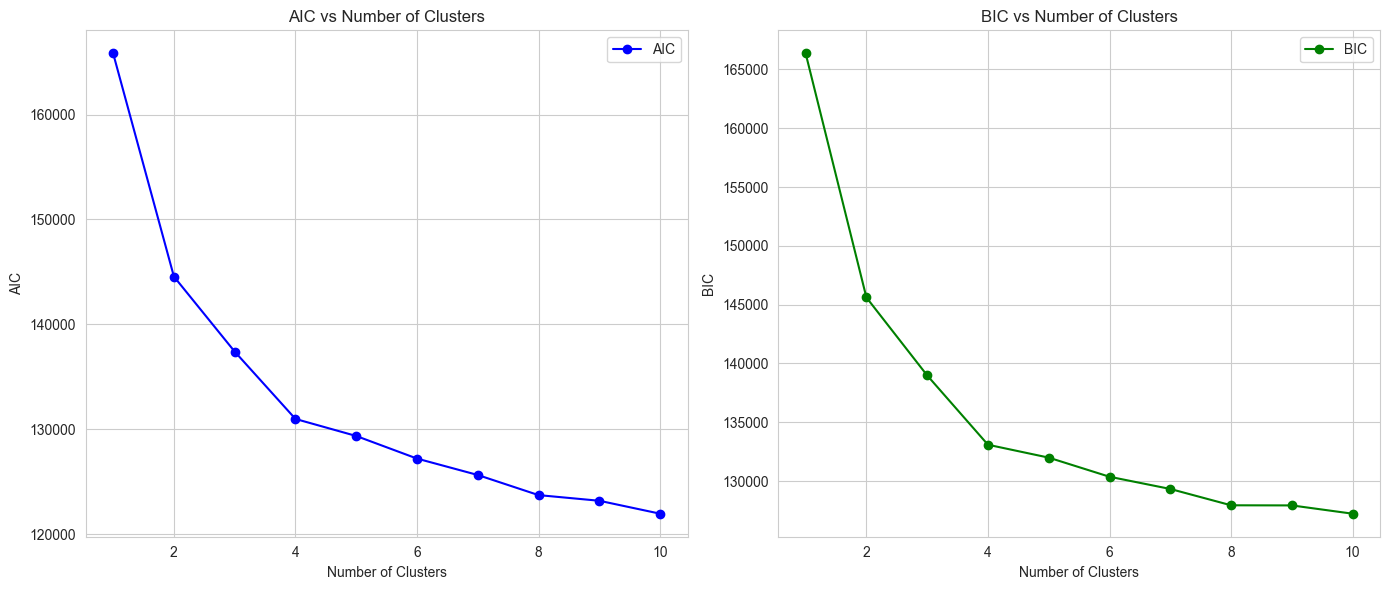

In [195]:
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Range of cluster numbers (from 1 to 10)
n_components_range = range(1, 11)

# Lists to store AIC and BIC values
aic_values = []
bic_values = []

# Fit GMM for each number of clusters (n_components)
for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=101)
    gmm.fit(X_scaled)  # Fit model to scaled data
    aic_values.append(gmm.aic(X_scaled))  # Append AIC value
    bic_values.append(gmm.bic(X_scaled))  # Append BIC value

# Plot AIC and BIC
plt.figure(figsize=(14, 6))

# AIC Plot
plt.subplot(1, 2, 1)
plt.plot(n_components_range, aic_values, marker='o', color='b', label='AIC')
plt.title('AIC vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('AIC')
plt.legend()

# BIC Plot
plt.subplot(1, 2, 2)
plt.plot(n_components_range, bic_values, marker='o', color='g', label='BIC')
plt.title('BIC vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('BIC')
plt.legend()

plt.tight_layout()
plt.show()


Based on the AIC and BIC plots, you should consider the number of clusters where both AIC and BIC values are minimized. Typically, the optimal number of clusters is where these values start to level off or show the lowest points on the graph. This ensures that the model is well-balanced, capturing the structure of the data without overfitting.

If both AIC and BIC converge to their lowest values around the same number of clusters, that is the ideal choice. In general, you should select the number of clusters that offers the best trade-off between a good fit (low AIC/BIC) and model simplicity.

If you have a clear dip in AIC/BIC values at a specific number of clusters (e.g., 4, 5, or 6), those are strong candidates to explore further. Make sure to visually inspect the resulting clusters as well to confirm that they make sense in the context of your data.

found that the AIC and BIC are lowest at 10 clusters, then this would be the optimal number of clusters for your Gaussian Mixture Model (GMM).

Next Step:

**Using 10 clusters:** We can now fit the GMM model with 10 clusters and analyze the resulting clusters.

In [205]:
# Fit the GMM model with 10 clusters (based on your optimal selection)
gmm = GaussianMixture(n_components=10, random_state=101)
gmm_labels = gmm.fit_predict(X_scaled)

# Add the GMM cluster labels to the dataset
numeric_df['GMM_Cluster'] = gmm_labels


#### Creating histograms for each variable, with the data separated by cluster

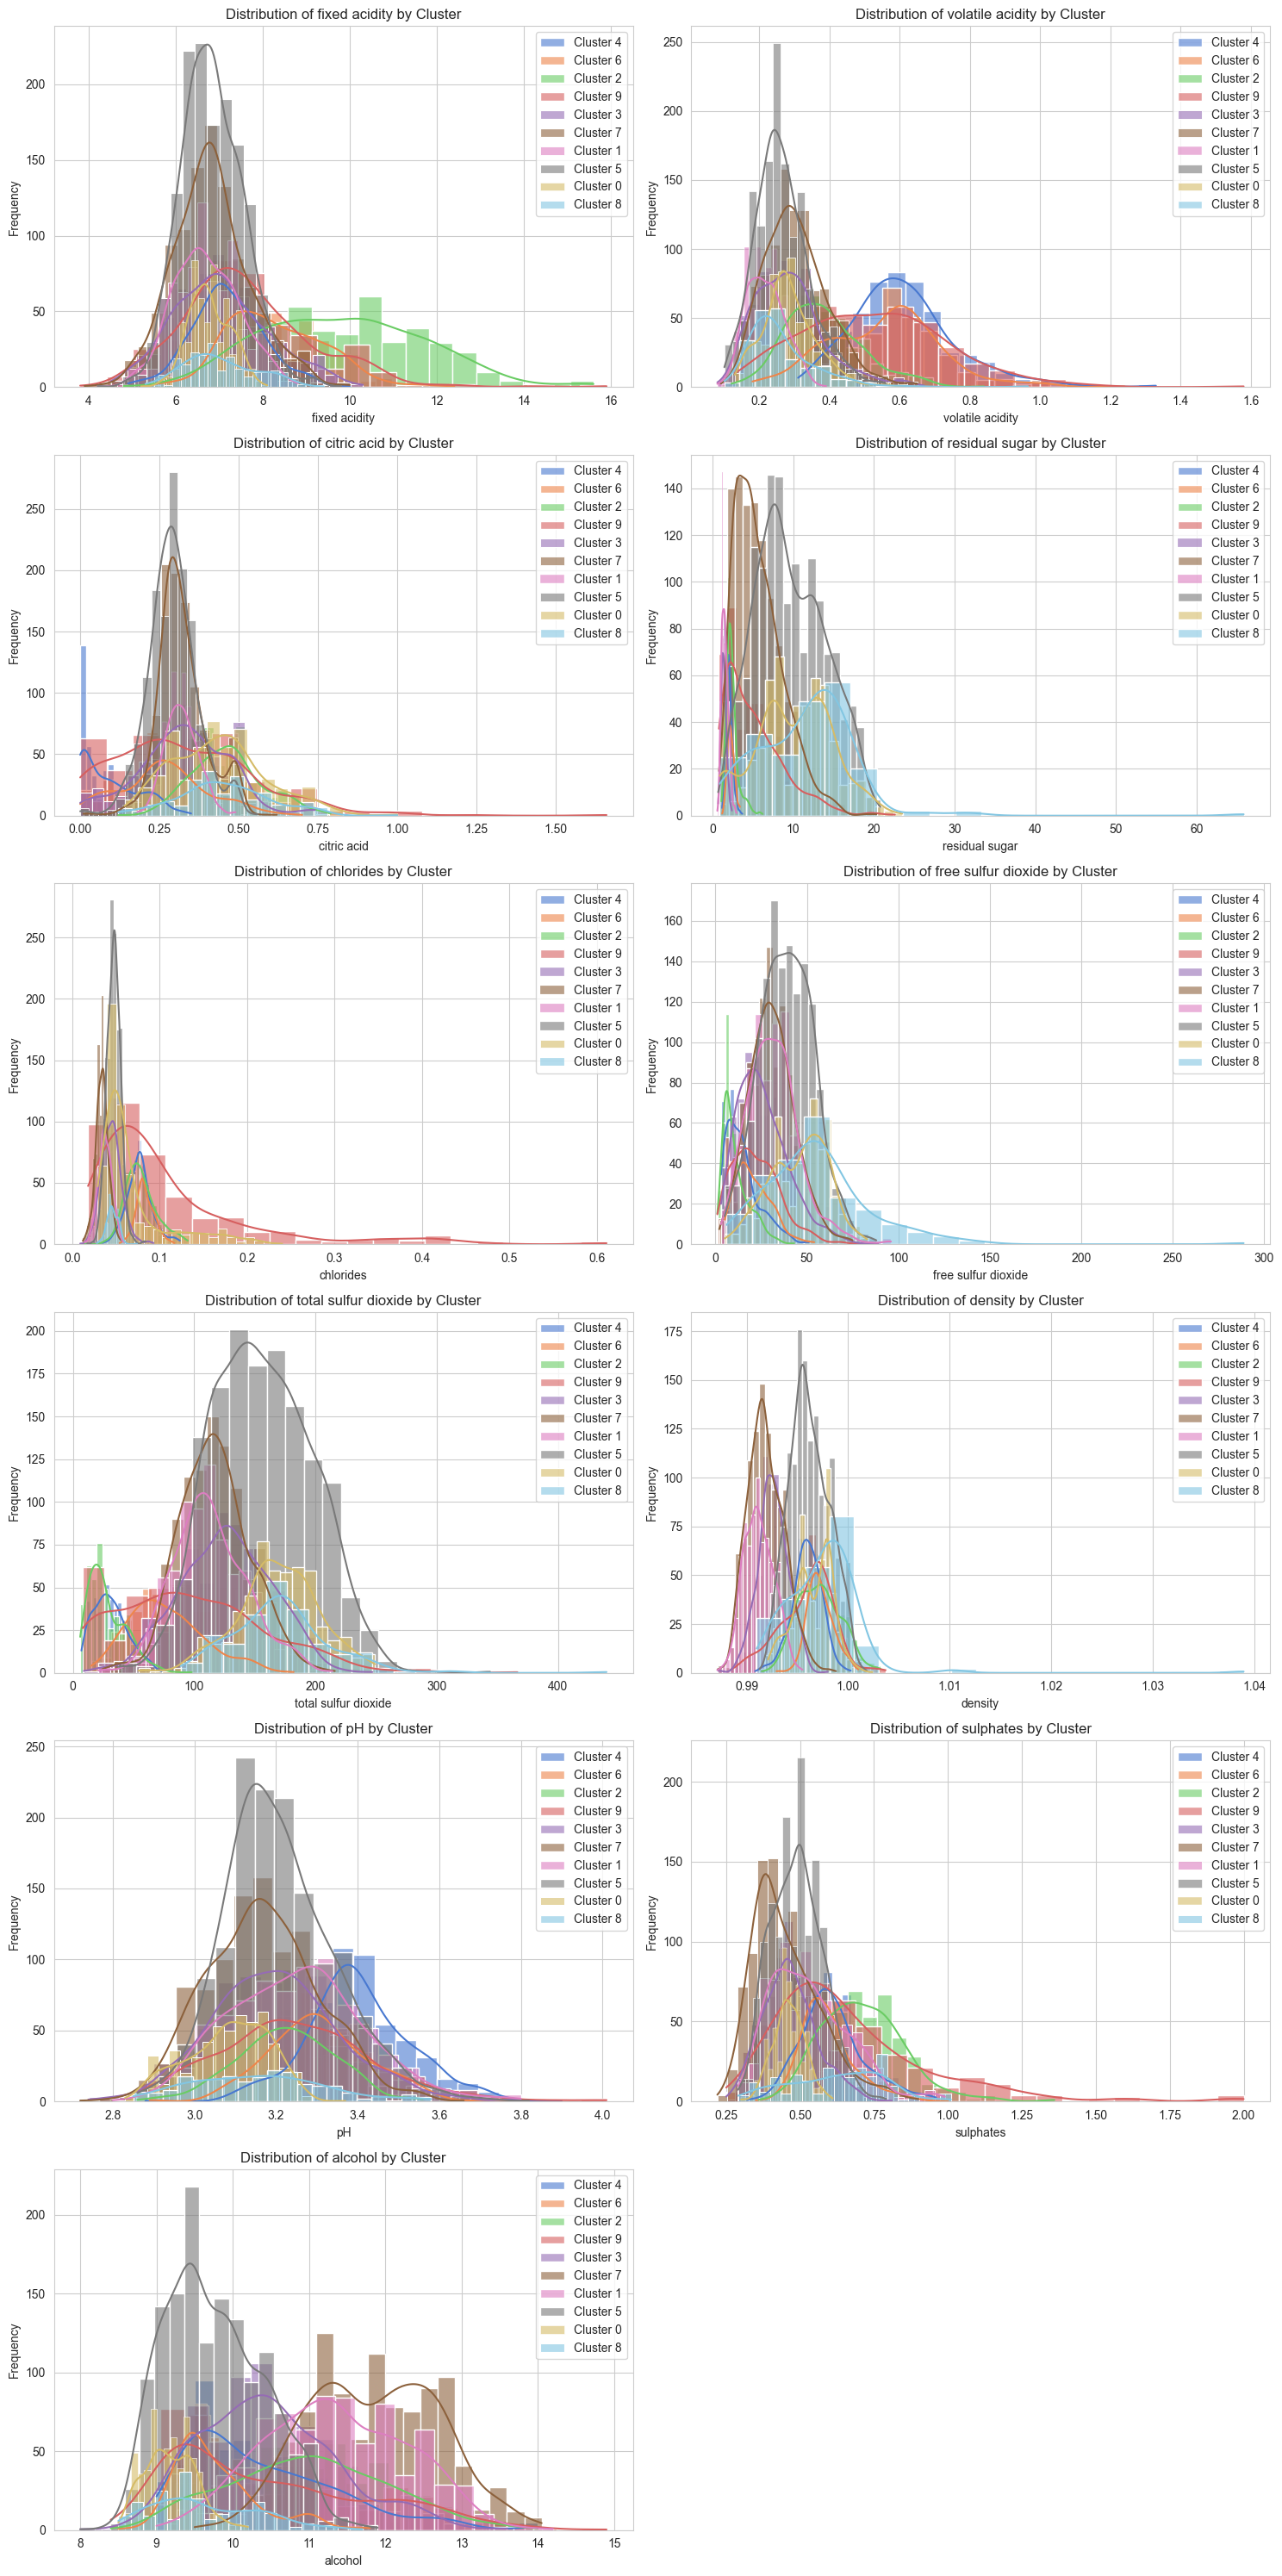

In [207]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of features to plot (exclude 'GMM_Cluster' column)
features = [col for col in X.columns if col != 'GMM_Cluster']  # Exclude the GMM_Cluster column

# Get the unique clusters
clusters = numeric_df['GMM_Cluster'].unique()

# Define number of rows and columns for subplots
n_features = len(features)
n_cols = 2  # Adjust as needed
n_rows = (n_features + n_cols - 1) // n_cols  # Calculate required rows

# Plotting histograms
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.ravel()  # Flatten for easy iteration

for i, feature in enumerate(features):
    ax = axes[i]
    for cluster in clusters:
        if cluster != -1:  # Exclude the noise cluster (-1)
            sns.histplot(
                numeric_df[numeric_df['GMM_Cluster'] == cluster][feature],
                kde=True,
                label=f'Cluster {cluster}',
                bins=20,
                alpha=0.6,
                ax=ax
            )
    ax.set_title(f'Distribution of {feature} by Cluster')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
    ax.legend()

# Remove empty subplots if there are fewer features than subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### Interpretation:
The most discriminatory variables appear to be those with distinct cluster separation across multiple clusters. Based on visual inspection of the plots, the following variables stand out:

* **Alcohol:** The clusters are more clearly separated compared to other variables.

* **pH:** Clusters show distinct patterns.

* **Sulphates:** Noticeable separation among clusters.

* **Density:** Displays varying cluster distributions.

* **Total sulfur dioxide:** Some separation between clusters is evident.

In [210]:
# Creating list of most discriminatory variables
discriminatory_features = ["alcohol", "density", "pH", "sulphates", "total sulfur dioxide"]

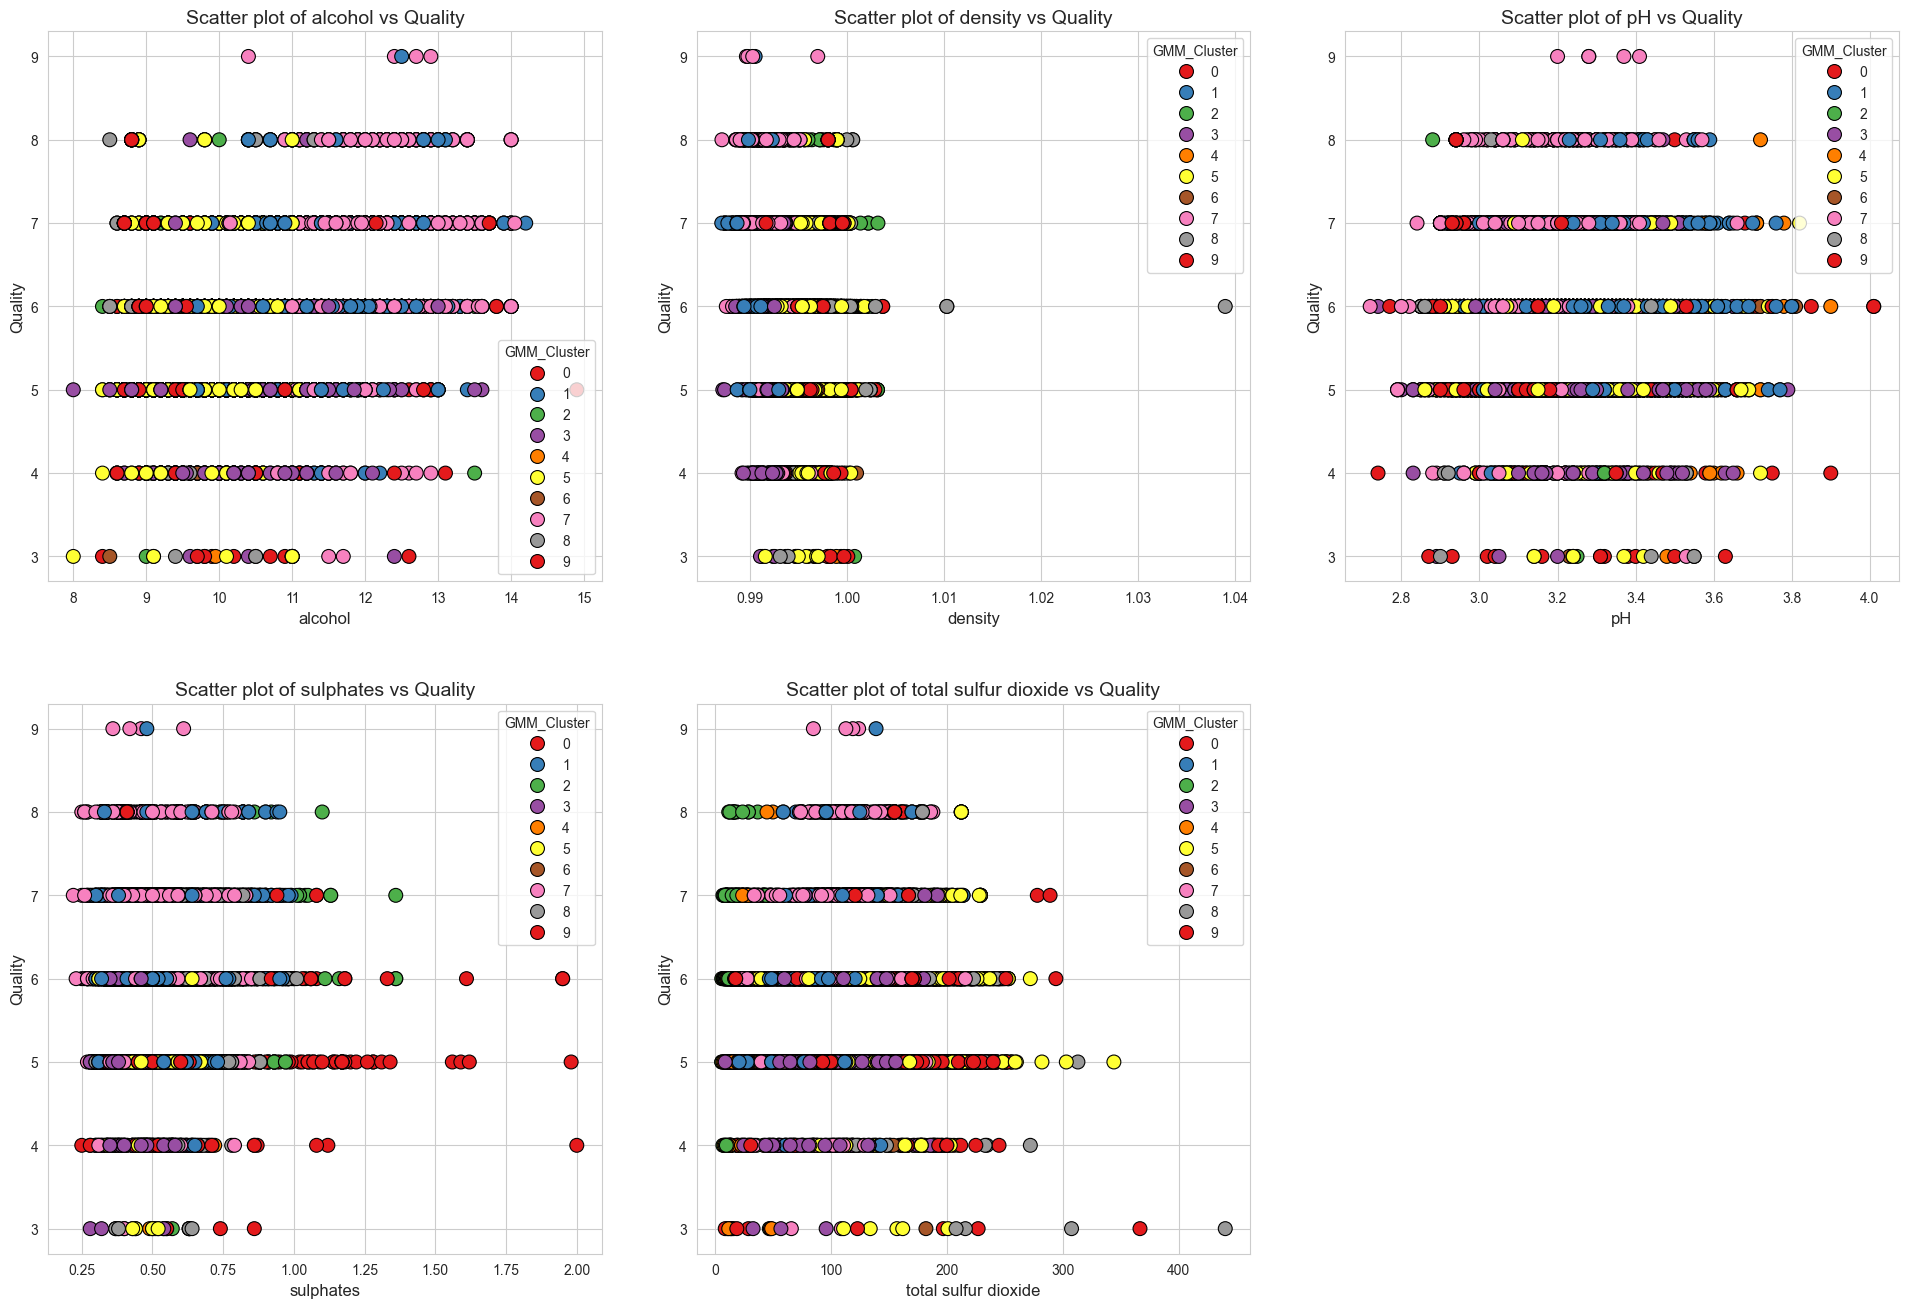

In [211]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes for the scatter plots with more space
fig, axes = plt.subplots(2, 3, figsize=(20, 14))  # Use a 2x3 grid to spread the plots

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot scatter plots for the top 5 discriminatory features
for i, feature in enumerate(discriminatory_features):
    sns.scatterplot(data= numeric_df, x=feature, y='quality', hue='GMM_Cluster', palette='Set1', ax=axes[i], s=100, edgecolor='black')
    axes[i].set_title(f'Scatter plot of {feature} vs Quality', fontsize=14)  # Increased title font size
    axes[i].set_xlabel(feature, fontsize=12)  # Increased xlabel font size
    axes[i].set_ylabel('Quality', fontsize=12)  # Increased ylabel font size

# Remove the unused subplot (the last one in the 2x3 grid)
axes[-1].axis('off')

# Add more space between plots and adjust layout
plt.tight_layout(pad=4.0)  # Increased padding between subplots
plt.show()


## **Interpretation of Scatter Plots of Wine Features vs Quality (GMM Clusters)**

### 1. Alcohol vs Quality
- **Observation**:  
  Higher alcohol content generally correlates with higher wine quality.
- **Cluster Insight**:  
  - Cluster 8 (pink) appears to dominate higher quality wines (Quality 8-9).  
  - Lower quality wines (Quality 3-5) are distributed across multiple clusters, indicating no clear alcohol preference.

---

### 2. Density vs Quality
- **Observation**:  
  Higher quality wines tend to have lower density.  
  Quality 5 and 6 are widely distributed across the range of densities (0.99 to 1.04).
- **Cluster Insight**:  
  - Clusters 0, 2, and 4 cover mid-density wines, indicating moderate quality wines.

---

### 3. pH vs Quality
- **Observation**:  
  pH values for most wines are between 3.0 and 3.5, irrespective of quality.
- **Cluster Insight**:  
  - Clusters are spread across the pH range, suggesting pH is not a significant determinant of wine quality.  
  - Cluster 8 shows higher occurrence in higher quality wines (7-9).

---

### 4. Sulphates vs Quality
- **Observation**:  
  Higher sulphate content correlates slightly with higher quality wines.
- **Cluster Insight**:  
  - Cluster 3 (red) dominates at higher sulphate levels (1.0+), suggesting a tendency for high sulphate wines to have higher quality.

---

### 5. Total Sulfur Dioxide vs Quality
- **Observation**:  
  Wines with high sulfur dioxide content tend to fall between quality 4 to 6.  
  Higher quality wines (7-9) have relatively lower sulfur dioxide.
- **Cluster Insight**:  
  - Clusters 1 and 6 show high concentrations at moderate sulfur dioxide levels (100-200).  
  - Cluster 8 represents fewer wines with high quality and low sulfur dioxide levels.

---

### Conclusion
- **Cluster 8** (pink) appears prominently in higher quality wines, indicating that it may represent premium wines.
- Features like **alcohol** and **sulphates** show more significant correlation with quality than **pH** or **density**.


## Comparison of K-Means and GMM Clustering Results

### 1. Cluster Formation and Shape
- **K-Means**: 
  - Assumes clusters are spherical.
  - Assigns each point to the nearest centroid.
  - Effective for simple data structures but struggles with overlapping or elliptical clusters.
- **GMM**: 
  - Models data as a mixture of Gaussian distributions.
  - Allows for clusters of varying shapes (elliptical or overlapping).
  - Provides probabilistic assignments, offering richer insights into ambiguous points.

### 2. Optimal Number of Clusters
- **K-Means**:
  - Determined using the "Elbow Method" and silhouette scores.
  - Optimal clusters identified as 3.
- **GMM**:
  - Optimal clusters selected based on AIC (Akaike Information Criterion) and BIC (Bayesian Information Criterion).
  - GMM identified 10 clusters, capturing finer granularity in the data.

### 3. Discriminatory Variables
- Both methods identified the following as significant variables for clustering:
  - **Alcohol**
  - **Density**
  - **pH**
  - **Sulphates**
- But as difference, GMM identified **Total sulfur dioxide** as a discriminatory variable whereas **Volatile Acidity** instead.
- **GMM** often showed finer separations within these features due to its probabilistic nature.

### 4. Visualization of Results
- **K-Means**:
  - Showed clear clusters but constrained to equal variance and circularity.
- **GMM**:
  - Highlighted more complex structures within the data.
  - Captured overlapping but distinct regions, especially in variables like **alcohol** and **density**.

### 5. Interpretation
- **GMM**:
  - Provided better insights into overlapping clusters.
  - Revealed hidden relationships that K-Means might oversimplify.
- **K-Means**:
  - Faster and computationally simpler.
  - Less flexible in capturing complex data distributions.

### 6. Applications and Use Cases
- **K-Means**:
  - Best for exploratory analysis when computational simplicity is preferred.
- **GMM**:
  - Ideal for datasets requiring detailed understanding of cluster distributions or soft clustering.

---
# **Honour Statement**
### ***“I confirm that all work submitted is my own and that I have neither given, sought, nor  received aid in relation to this assignment.*** 

**Signed:** Sudhanshu Naresh Nerkar(24226989)   
**Date:** 02 December 2024

----